In [30]:
import numpy as np
import pandas as pd;
import scipy.stats as stats

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

#### MATH 189 Winter 2024

## Dropout Analytics: Understanding Key Drivers for Dropout Students
##### Leena Kang, Samuel Mai, Krystal Qiu, Ethan Lin, Mackenzie May

### Introduction (Ethan) 

In an ideal world, every student has an equal chance to be successful in their educational pursuits. Academic success is strongly correlated with success in adulthood, so when students drop out of school, it reveals patterns of inequality in our educational system that must be addressed. Although dropout rates in the United States have declined in the past decade, we can leverage data to analyze the leading causes of dropouts in order to make better informed solutions to further reduce dropout rates. With this project, we hope to identify which factors are significantly correlated with academic success. These findings, if the factors are controllable, would be able to provide future students and/or parents with guidance on positive actions that can be taken to help level the playing field. In addition, the findings can help to reduce dropout rates, by influencing education policy makers to make adjustments to policy and informing parents how to identify if their children are at the risk of dropping out of school. With our findings, we aim to answer the question: "What causes students to drop out of high school?"

The analysis of drop outs is not a new topic. The 2013 research article "Understanding why Students Drop Out of High School, According to Their Own Reports," by Jonathan Jacob Doll, Zohreh Eslami, and Lynne Walters, highlights how "research on school dropout extends from early 20th-century pioneers until now, marking trends of causes and prevention." The article goes on to break down the three main factors that play a role in dropping out. "Push factors include school-consequence on attendance or disciple. Pull factors include out-of-school enticements like jobs and family. Finally, falling out factors refer to disengagement in students not caused by school or outside pulling factors." The article also found that pull factors play the largest role in drop out rates, while push factors have been playing an increasingly larger role. It is theorized that the No Child Left Behind Act of 2001, which increased the standards of education, also led many students to drop out due to feelings of academic inadequacy. Another key insight was the gender disparity, with male students reporting the highest rates of push factors and female students reporting the highest rates of pull factors.

Another analysis of high school drop outs is Dr. Imed Bouchrika's 'High School Dropout Rate Is Decreasing but Race, Income & Disability Issues Persist in 2024.' It reports on how drop out rates are highly correlated with the issues of race, sex, and socioeconomic status. In particular, American Indian/Alaska Native students have higher drop out rates than any other racial group, disabled students are two times more likely to drop out than non-disabled students, and male students are more likely to drop out than female students. There is also the strong negative correlation between family income level and drop out rates, although the rate gap between the richest and poorest has been shrinking in recent years. Similar to the previous article, this article specifies school and family as two of the main reasons for dropping out, but it also cites employment as a key factor.

### The Dataset (Ethan)

For our project, we decided to use a dataset adopted from the UCI Machine Learning Repository that includes data containing the academic path, demographics, and socio-economic status of each student along with their academic performance. Each row represents a student, and records their academic status at the end of semester as dropout, enrolled, or graduate. With this, we intend to investigate whether any discrepancies between ‘successful’ and ‘unsuccessful’ students are statistically significant.

### Data Cleaning + Exploratory Data Analysis (Leena)

In [31]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697) 
  
# data (as pandas dataframes) 
X = predict_students_dropout_and_academic_success.data.features 
y = predict_students_dropout_and_academic_success.data.targets 

df1_raw = X.assign(Target=y.get('Target'))

# making a copy to use 
df1 = df1_raw.copy(deep=True)

df1_raw.head()

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [32]:
df1_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital Status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

> ### Data Cleaning and Preprocessing

In [33]:
df1_raw.isnull().sum() # no null values

Marital Status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

> ##### We removed columns related to appliction as it does not have much relation with our research project, and the meaning behind each category was left a little unclear.

In [34]:
# removing columns 
df1 = df1.drop(columns=['Application mode', 'Application order'])

> ##### The dataset is made up of binary and multiclass data represented as integers. For clarity, we referred to its documentation and converted integer values to its corresponding description (if applicable).

In [35]:
# converting binary data

binary_cols = ['Daytime/evening attendance','Displaced', 'Educational special needs', 'Debtor',
               'Tuition fees up to date', 'Scholarship holder',]

def get_attendance(val):
    if val == 1:
        return 'Day'
    else:
        return 'Evening'

def get_gender(val):
    if val == 1:
        return 'Male'
    else:
        return 'Female'

df1 = df1.assign(isDisplaced = (df1.get('Displaced') == 1))
df1 = df1.assign(hasSpecialNeeds = (df1.get('Educational special needs') == 1))
df1 = df1.assign(tuitionToDate = (df1.get('Tuition fees up to date') == 1))
df1 = df1.assign(hasScholarship = (df1.get('Scholarship holder') == 1))
df1 = df1.assign(isDebtor = (df1.get('Debtor') == 1))
df1['Gender'] = df1.get('Gender').apply(get_gender)
df1['AttendanceTime'] = df1.get('Daytime/evening attendance').apply(get_attendance)

df1 =df1.drop(columns=binary_cols)

In [36]:
# sanity check 
print(df1_raw['Displaced'].value_counts())
df1['isDisplaced'].value_counts()

Displaced
1    2426
0    1998
Name: count, dtype: int64


isDisplaced
True     2426
False    1998
Name: count, dtype: int64

> ##### Directly converting integer values to its corresponding description

In [37]:
def get_marital_status(int):
    marital_status = {
        1:'Single',
        2:'Married',
        3:'Widower',
        4:'Divorced',
        5:'Facto Union',
        6:'Legally Separated'
    }
    return marital_status[int]

def get_course(int):
    courses = {
        33: 'Biofuel Production Technologies',
        171: 'Animation and Multimedia Design',
        8014: 'Social Service (evening attendance)',
        9003: 'Agronomy',
        9070: 'Communication Design', 
        9085: 'Veterinary Nursing', 
        9119: 'Informatics Engineering', 
        9130: 'Equinculture', 
        9147: 'Management', 
        9238: 'Social Service', 
        9254: 'Tourism', 
        9500: 'Nursing', 
        9556: 'Oral Hygiene', 
        9670: 'Advertising and Marketing Management', 
        9773: 'Journalism and Communication', 
        9853: 'Basic Education', 
        9991: 'Management (evening attendance)'
    }
    return courses[int]

def get_nationality(int):
    nationality = {
        1 : 'Portuguese',
        2 : 'German',
        6 : 'Spanish',
        11 : 'Italian',
        13 :'Dutch',
        14 : 'English',
        17 : 'Lithuanian',
        21 : 'Angolan',
        22 : 'Cape Verdean',
        24 : 'Guinean',
        25 : 'Mozambican',
        26 : 'Santomean',
        32 : 'Turkish',
        41 : 'Brazilian',
        62 : 'Romanian',
        100 : 'Moldova (Republic of)',
        101 : 'Mexican',
        103 : 'Ukrainian',
        105 : 'Russian',
        108 : 'Cuban',
        109 : 'Colombian'
    }
    return nationality[int]


df1['Marital Status'] = df1.get('Marital Status').apply(get_marital_status)
df1['Course'] = df1.get('Course').apply(get_course)
df1['Nationality'] = df1.get('Nacionality').apply(get_nationality)
df1 = df1.drop(columns=['Nacionality'])

In [38]:
# sanity check 
print(df1_raw['Marital Status'].value_counts())
df1['Marital Status'].value_counts()

Marital Status
1    3919
2     379
4      91
5      25
6       6
3       4
Name: count, dtype: int64


Marital Status
Single               3919
Married               379
Divorced               91
Facto Union            25
Legally Separated       6
Widower                 4
Name: count, dtype: int64

##### Columns associated with **education level** and contains many specific cateogories that can be arguably grouped together (some which only has one count). Below details how the data for these columns are categorized: 

> `Previous qualification`:
>
> >**Below secondary** - did not complete high school
> >
> >**Secondary** - completed high school or equivalent,
> >
> >**Higher** - bachelor's (or equivalent) or above
> >
>
> `Mother's qualification` and `Father's qualification`:
>
>> **Basic** - below high school education
>>
>>**Secondary** - completed high school or equivalent
>>
>>**Higher** - bachelor's (or equivalent) or above
>>
>>
>>**Unknown** - information unknown

In [39]:
def get_prev_qual(int):
    higher_education = [2,3,4,5,6,40,42,43,39]
    
    if int == 1:
        return 'Secondary'
    elif int in higher_education:
        return 'Higher'
    else:
        return 'Below secondary'

def get_mother_qual(int):
    basic_education = [9,10,11,12,14,18,19,26,27,29,30,35,36,37,38]
    higher_education = [2,3,4,5,6,22,39,40,41,42,43,44]
    
    if int == 1:
        return 'Secondary'
    elif int in basic_education:
        return 'Basic'
    elif int in higher_education:
        return 'Higher'
    else:
        return 'Unknown'

def get_father_qual(int):
    basic_education = [9,10,11,12,13,14,18,19,20,25,26,27,29,30,31,35,36,37,38]
    higher_education = [2,3,4,5,6,22,33,39,40,31,32,43,44]
    
    if int == 1:
        return 'Secondary'
    elif int in basic_education:
        return 'Basic'
    elif int in higher_education:
        return 'Higher'
    else:
        return 'Unknown'

df1['Previous qualification'] = df1.get('Previous qualification').apply(get_prev_qual)
df1['Mother\'s qualification'] = df1.get('Mother\'s qualification').apply(get_mother_qual)
df1['Father\'s qualification'] = df1.get('Father\'s qualification').apply(get_father_qual)

#### Target 
##### The target variable consists of 3 categories (graduate, enrolled, droupout), but since this research is primarily concerned with whether students dropped out of school or not, we combined 'graduate' and 'erolled' into one category 

In [40]:
df1_raw['Target'].value_counts()

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64

In [41]:
# Combining 'Graduate' and 'Enrolled' into one 

def get_target(y):
    if (y == 'Graduate') or (y == 'Enrolled'):
        return 'Graduate/Enrolled'
    else:
        return 'Dropout'
        
df1['Target'] = df1.get('Target').apply(get_target)

> ### Exploratory Data Analysis and Visualization

In [42]:
df1['Target'].value_counts()

Target
Graduate/Enrolled    3003
Dropout              1421
Name: count, dtype: int64

**Note that there is almost twice as many students who have graduated/enrolled, as expeccted.**

### Multiclass Data and Target

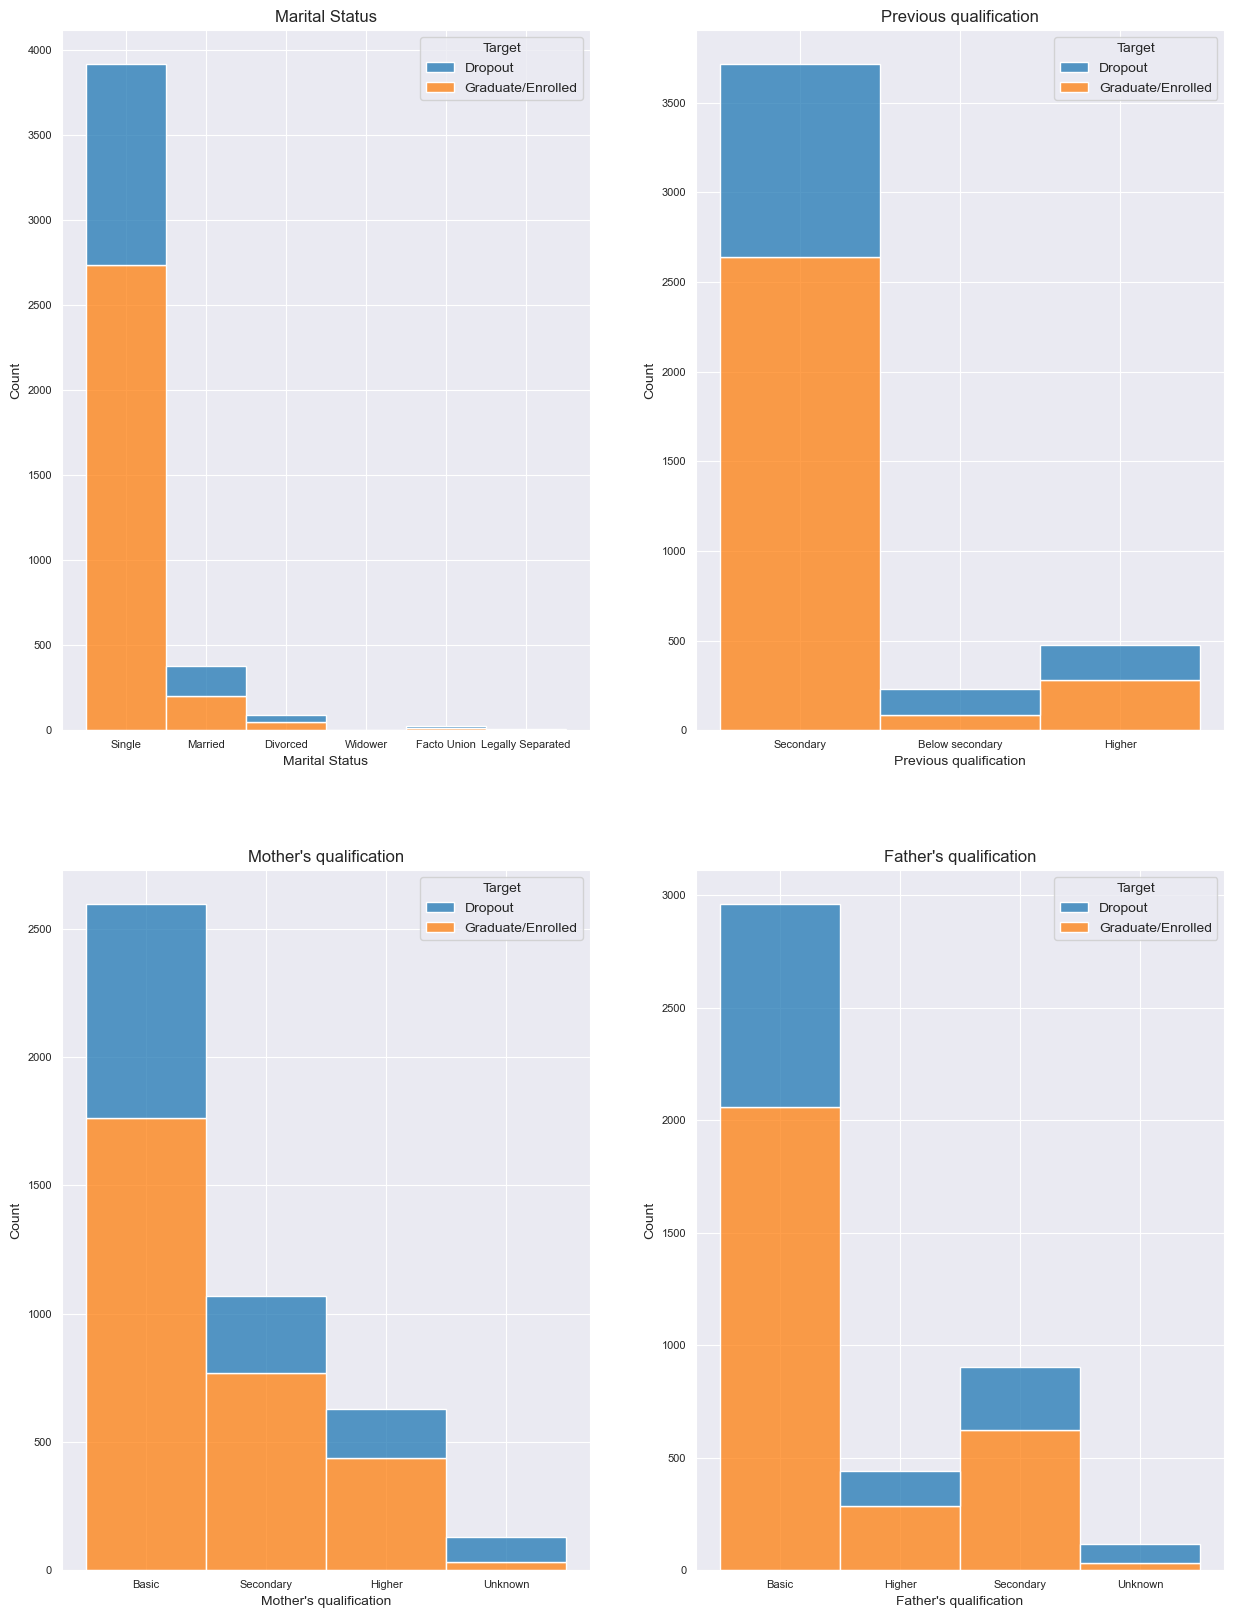

In [43]:
sns.set_style('darkgrid')

cols = ['Marital Status', 'Previous qualification', 'Mother\'s qualification', 'Father\'s qualification']

pos = 1
plt.figure(figsize=(15,20))
for col in cols:
    plt.subplot(2,2,pos)
    b = sns.histplot(data=df1, x=col, hue='Target', multiple = 'stack')
    b.tick_params(labelsize=8)
    plt.title(f"{col}")
    pos += 1

#### Marital Status and Previous Qualificaion: Relative Frequencies

> Due to the imbalance of data, visualizing the relative frequencies of dropout and graduate/enrolled students can provide a clearer picture of potentially significant differences.

In [44]:
# creating dataframe with relative frequencies for each target 
df1_grad = df1[df1['Target'] == 'Graduate/Enrolled']
df1_drop = df1[df1['Target'] == 'Dropout']

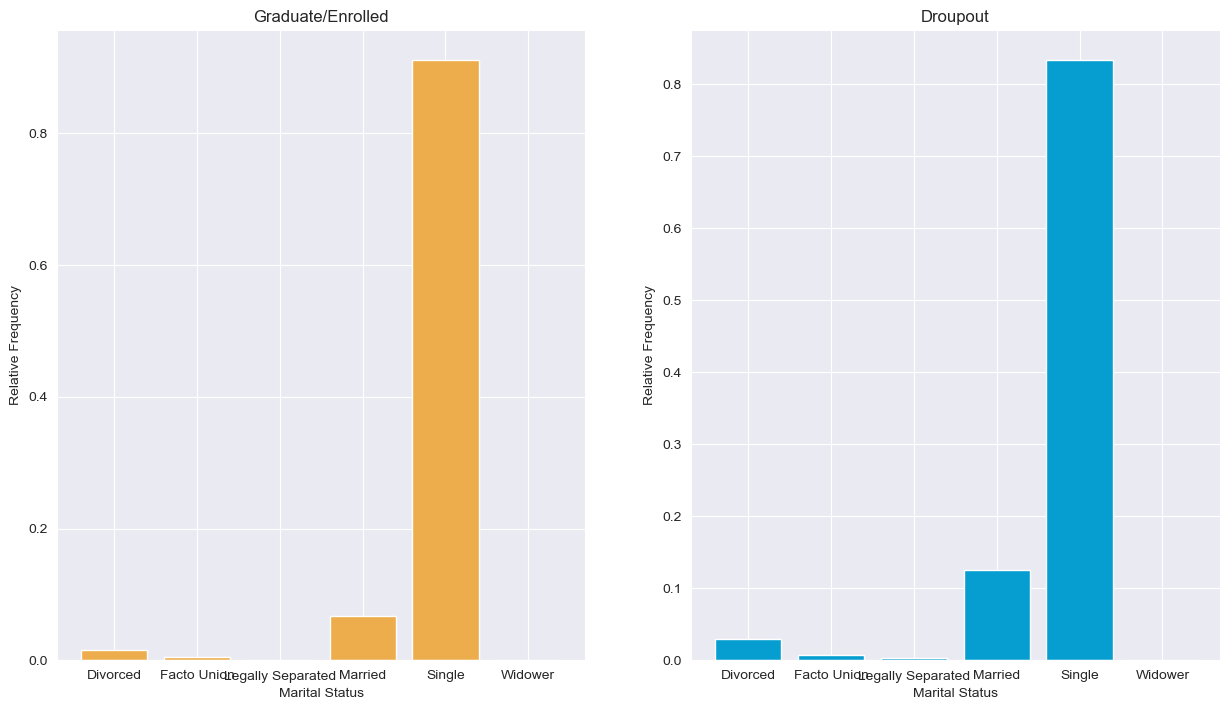

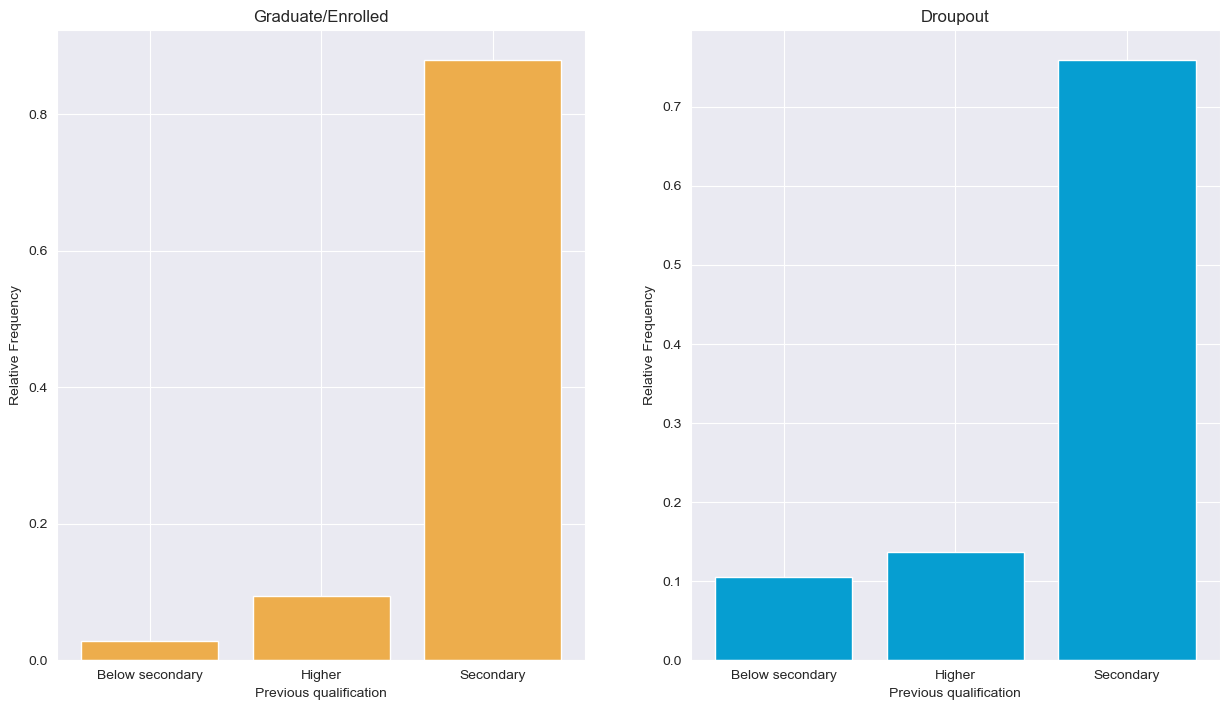

In [45]:
cols = ['Marital Status', 'Previous qualification']

pos = 1
for col in cols:
    plt.figure(figsize=(15,18))
    
    #creating DF with col, relative frequency for GRADUATE/ENROLLED
    grad_relfreq = df1_grad.groupby(col).count().reset_index()
    grad_relfreq = grad_relfreq.assign(Relative_Frequency = grad_relfreq.get('Course') / df1_grad.shape[0])
    grad_relfreq = grad_relfreq[[col, 'Relative_Frequency']]
    #convert bool val to String object
    grad_relfreq[col] = grad_relfreq.get(col).astype(str)

    #plot
    plt.subplot(2,2,pos)
    plt.bar(data=grad_relfreq, x=col, height='Relative_Frequency', color='#edad4c')
    plt.xlabel(col)
    plt.ylabel('Relative Frequency')
    plt.title('Graduate/Enrolled')

    #increment 
    pos += 1

    #creating DF with col, relative frequency for DROPOut
    drop_relfreq = df1_drop.groupby(col).count().reset_index()
    drop_relfreq = drop_relfreq.assign(Relative_Frequency = drop_relfreq.get('Course') / df1_drop.shape[0])
    drop_relfreq = drop_relfreq[[col, 'Relative_Frequency']]
    drop_relfreq[col] = drop_relfreq.get(col).astype(str)

    #plot
    plt.subplot(2,2,pos)
    plt.bar(data=drop_relfreq, x=col, height='Relative_Frequency', color='#069ed1')
    plt.xlabel(col)
    plt.ylabel('Relative Frequency')
    plt.title('Droupout')
    
    plt.show()

    #increment 
    pos += 1

> #### Key Observations

- A **larger proportion** of dropout students are **married** or **divorced**
- A **larger proportion** of dropout students did not complete high school (**_i.e., Below secondary_**)

In [46]:
# storing relative frequencies 

    #marital_status
marital_status = pd.crosstab(df1['Target'], df1['Marital Status'])
marital_status_relfreq_drop = marital_status.loc['Dropout'] / df1_drop.shape[0]
marital_status_relfreq_grad = marital_status.loc['Graduate/Enrolled'] / df1_grad.shape[0]

    #previous qualification
prev_qual = pd.crosstab(df1['Target'], df1['Previous qualification'])
prev_qual_relfreq_drop = prev_qual.loc['Dropout'] / df1_drop.shape[0]
prev_qual_relfreq_grad = prev_qual.loc['Graduate/Enrolled'] / df1_grad.shape[0]

### Binary Data and Target

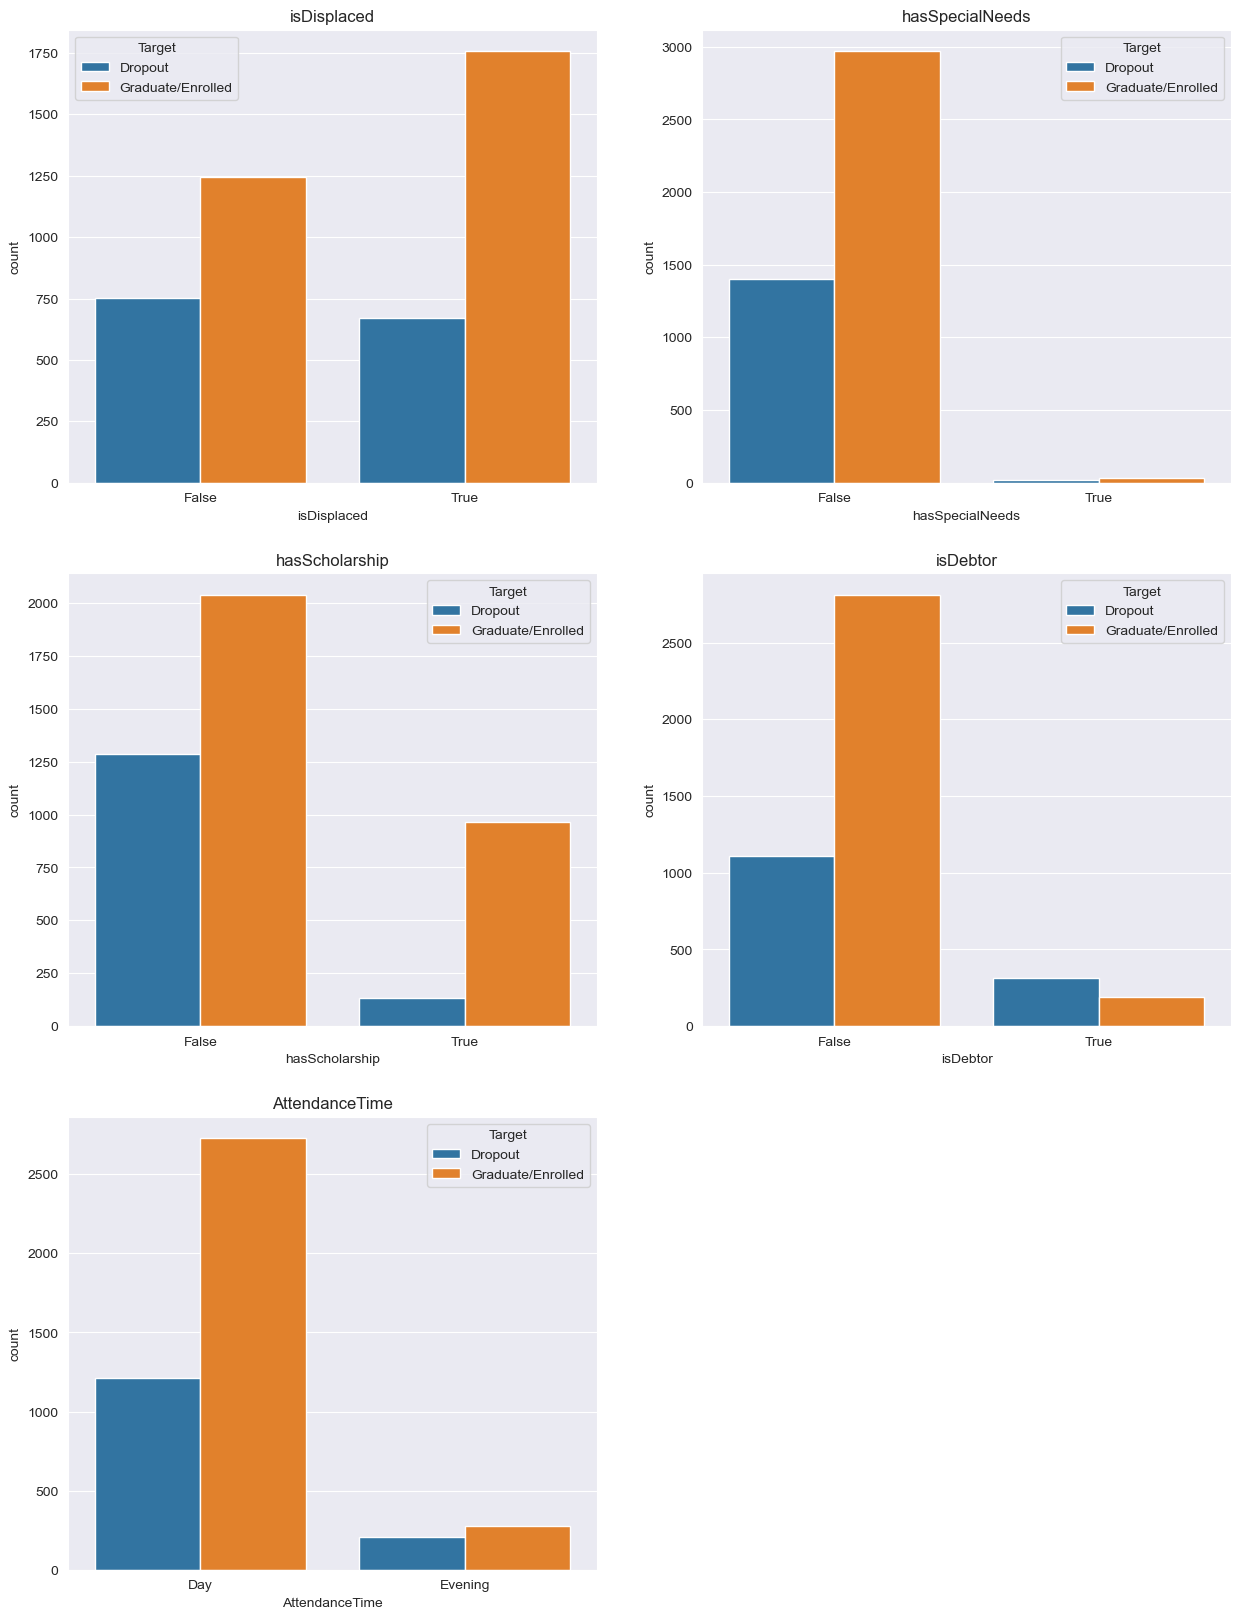

In [47]:
cols = ['isDisplaced', 'hasSpecialNeeds', 'hasScholarship', 'isDebtor', 'AttendanceTime']

pos = 1
plt.figure(figsize=(15,20))
for col in cols:
    plt.subplot(3,2,pos)
    b = sns.countplot(data=df1, x=col, hue='Target')
    # b.tick_params(labelsize=8)
    plt.title(f"{col}")
    pos += 1

#### Relative Frequencies and the Target
> Similarly, due to the imbalance of data, rather than plotting the counts of each feature, it's worth graphing the relative frequencies of each feature for each target variable. 

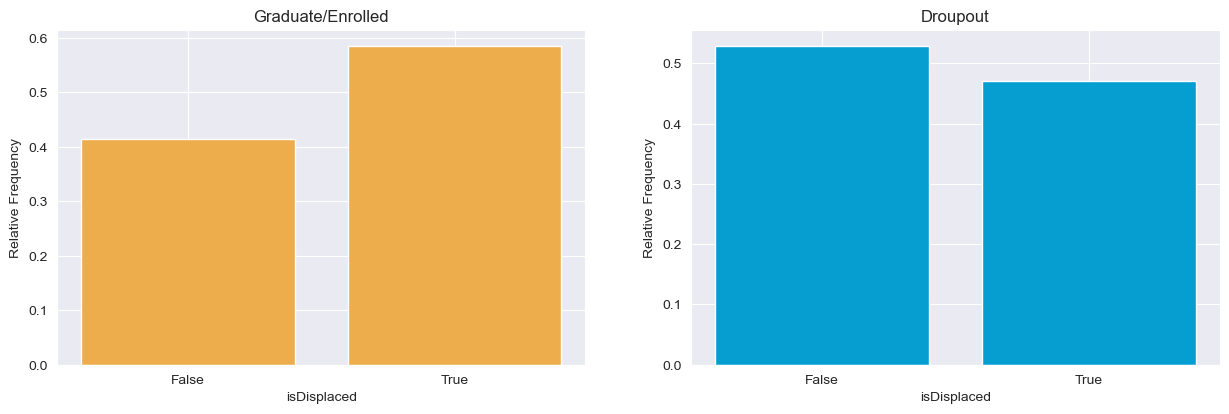

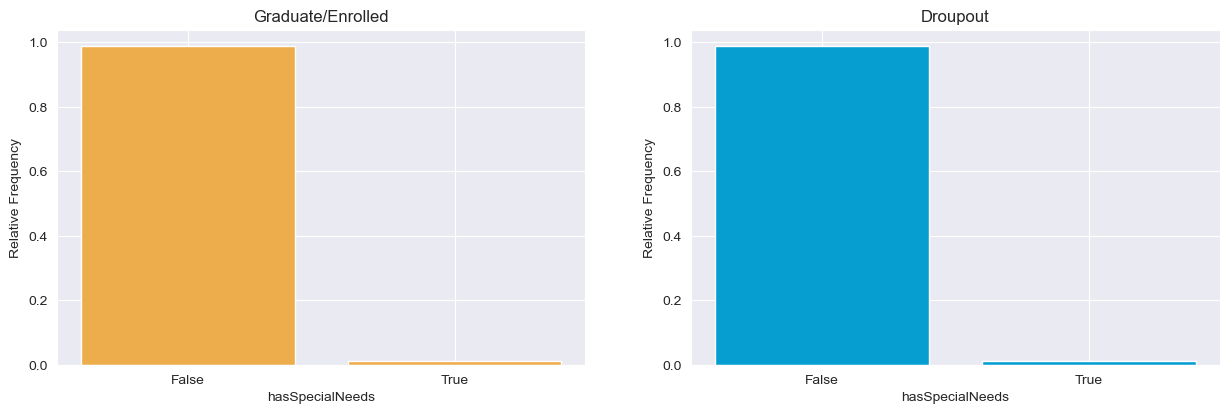

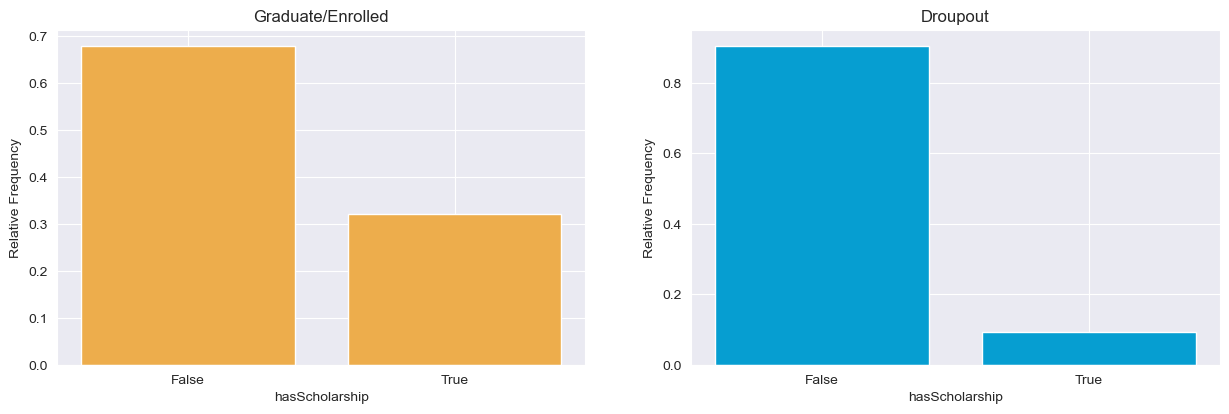

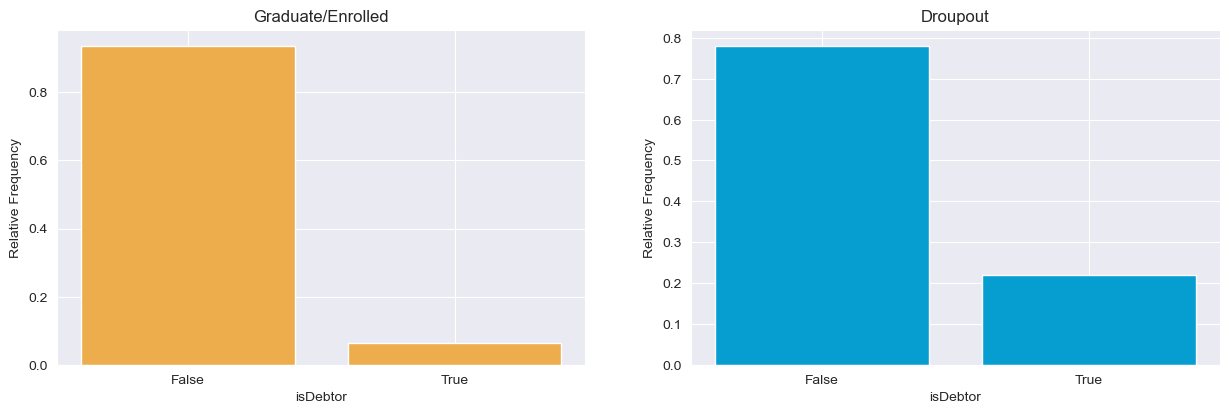

In [48]:
# features with boolean types
cols = ['isDisplaced', 'hasSpecialNeeds', 'hasScholarship', 'isDebtor']

pos = 1
for col in cols:
    plt.figure(figsize=(15,20))
    
    #creating DF with col, relative frequency for GRADUATE/ENROLLED
    grad_relfreq = df1_grad.groupby(col).count().reset_index()
    grad_relfreq = grad_relfreq.assign(Relative_Frequency = grad_relfreq.get('Course') / df1_grad.shape[0])
    grad_relfreq = grad_relfreq[[col, 'Relative_Frequency']]
    #convert bool val to String object
    grad_relfreq[col] = grad_relfreq.get(col).astype(str)

    #plot
    plt.subplot(4,2,pos)
    plt.bar(data=grad_relfreq, x=col, height='Relative_Frequency', color='#edad4c')
    plt.xlabel(col)
    plt.ylabel('Relative Frequency')
    plt.title('Graduate/Enrolled')

    #increment 
    pos += 1

    #creating DF with col, relative frequency for DROPOut
    drop_relfreq = df1_drop.groupby(col).count().reset_index()
    drop_relfreq = drop_relfreq.assign(Relative_Frequency = drop_relfreq.get('Course') / df1_drop.shape[0])
    drop_relfreq = drop_relfreq[[col, 'Relative_Frequency']]
    drop_relfreq[col] = drop_relfreq.get(col).astype(str)

    #plot
    plt.subplot(4,2,pos)
    plt.bar(data=drop_relfreq, x=col, height='Relative_Frequency', color='#069ed1')
    plt.xlabel(col)
    plt.ylabel('Relative Frequency')
    plt.title('Droupout')
    
    plt.show()

    #increment 
    pos += 1

> ### Key Observations
- A **larger proportion** of dropout students were **not displaced** compared to graduate/enrolled students.
- A **smaller proprotion** of dropout students **had a scholarship**.
- A **larger proportion** of dropout students **were debtors**. 

In [49]:
# storing relative frequencies 

    #isDisplaced
displaced = pd.crosstab(df1['Target'], df1['isDisplaced'])
displaced_relfreq_drop = displaced.loc['Dropout'] / df1_drop.shape[0]
displaced_relfreq_grad = displaced.loc['Graduate/Enrolled'] / df1_grad.shape[0]

    #hasScholarship
hasScholarship = pd.crosstab(df1['Target'], df1['hasScholarship'])
hasScholarship_relfreq_drop = hasScholarship.loc['Dropout'] / df1_drop.shape[0]
hasScholarship_relfreq_grad = hasScholarship.loc['Graduate/Enrolled'] / df1_grad.shape[0]

    #isDebtor
isDebtor = pd.crosstab(df1['Target'], df1['isDebtor'])
isDebtor_relfreq_drop = isDebtor.loc['Dropout'] / df1_drop.shape[0]
isDebtor_relfreq_grad = isDebtor.loc['Graduate/Enrolled'] / df1_grad.shape[0]

### Student Academic Path: Course
> `Course` here supposedly represents the the undergraduate degree each student was enrolled in

In [50]:
df1['Course'].value_counts()

Course
Nursing                                 766
Management                              380
Social Service                          355
Veterinary Nursing                      337
Journalism and Communication            331
Advertising and Marketing Management    268
Management (evening attendance)         268
Tourism                                 252
Communication Design                    226
Animation and Multimedia Design         215
Social Service (evening attendance)     215
Agronomy                                210
Basic Education                         192
Informatics Engineering                 170
Equinculture                            141
Oral Hygiene                             86
Biofuel Production Technologies          12
Name: count, dtype: int64

In [51]:
course_relfreq = pd.crosstab(df1['Target'], df1['Course'])
course_relfreq.loc['Dropout'] = (course_relfreq.loc['Dropout'] / df1_drop.shape[0])
course_relfreq.loc['Graduate/Enrolled'] = (course_relfreq.loc['Graduate/Enrolled'] / df1_grad.shape[0])
course_relfreq

Course,Advertising and Marketing Management,Agronomy,Animation and Multimedia Design,Basic Education,Biofuel Production Technologies,Communication Design,Equinculture,Informatics Engineering,Journalism and Communication,Management,Management (evening attendance),Nursing,Oral Hygiene,Social Service,Social Service (evening attendance),Tourism,Veterinary Nursing
Target,,,,,,,,,,,,,,,,,
Dropout,0.066854,0.060521,0.057706,0.059817,0.005630,0.035890,0.054891,0.064743,0.071077,0.094300,0.095707,0.083040,0.023223,0.045742,0.049965,0.067558,0.063336
Graduate/Enrolled,0.057609,0.041292,0.044289,0.035631,0.001332,0.058275,0.020979,0.025974,0.076590,0.081918,0.043956,0.215784,0.017649,0.096570,0.047952,0.051948,0.082251


##### We will perform a chi-square test for each sample (dropout, and graduate/enrolled) to investigate if the courses enrolled for each sample are uniformly representative.

> #### Comparing Relative Frequencies for Each Course

In [52]:
index = [col for col in course_relfreq.columns]
dropouts = course_relfreq.loc['Dropout'].values
grads = course_relfreq.loc['Graduate/Enrolled'].values

# df with relative frequencies of each target
plot_course_relfreq = pd.DataFrame({'Dropout': dropouts, 'Graduate/Enrolled': grads}, index=index)

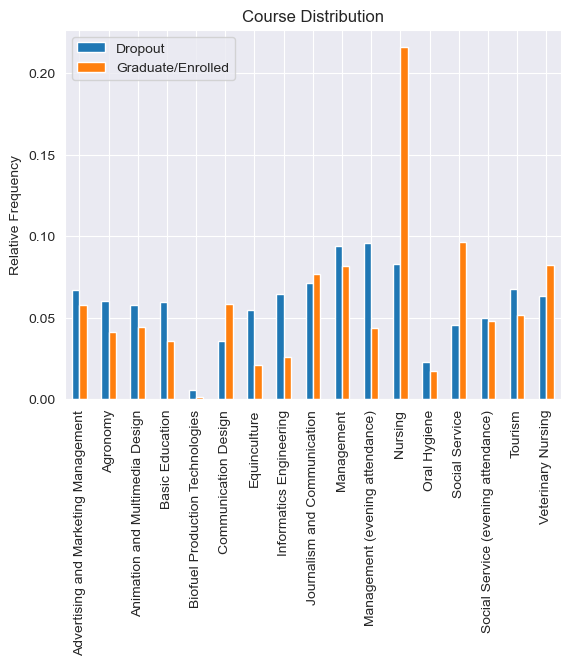

In [53]:
# plot
plot_course_relfreq.plot(kind='bar')
plt.ylabel('Relative Frequency')
plt.title('Course Distribution')
plt.show()

By observation,
- A larger proportion of **dropout students** were enrolled in **Equinculture, Informatics Engineering, Management**
- A larger proportion of **graduate/enrolled** students were enrolled in **Nursing, Social Service, Communication Design**

### Quantitative data: Identifying Correlations

In [54]:
# keep just the quantitative data for heatmap

cols = ['Admission grade', 'Age at enrollment', 'Previous qualification (grade)', 'Unemployment rate',
       'Inflation rate', 'GDP', 'Curricular units 2nd sem (grade)', 'Curricular units 1st sem (grade)', 'Target']

df1_quant = df1[cols]
df1_quant.head()

,Admission grade,Age at enrollment,Previous qualification (grade),Unemployment rate,Inflation rate,GDP,Curricular units 2nd sem (grade),Curricular units 1st sem (grade),Target
0,127.3,20,122.0,10.8,1.4,1.74,0.000000,0.000000,Dropout
1,142.5,19,160.0,13.9,-0.3,0.79,13.666667,14.000000,Graduate/Enrolled
2,124.8,19,122.0,10.8,1.4,1.74,0.000000,0.000000,Dropout
3,119.6,20,122.0,9.4,-0.8,-3.12,12.400000,13.428571,Graduate/Enrolled
4,141.5,45,100.0,13.9,-0.3,0.79,13.000000,12.333333,Graduate/Enrolled


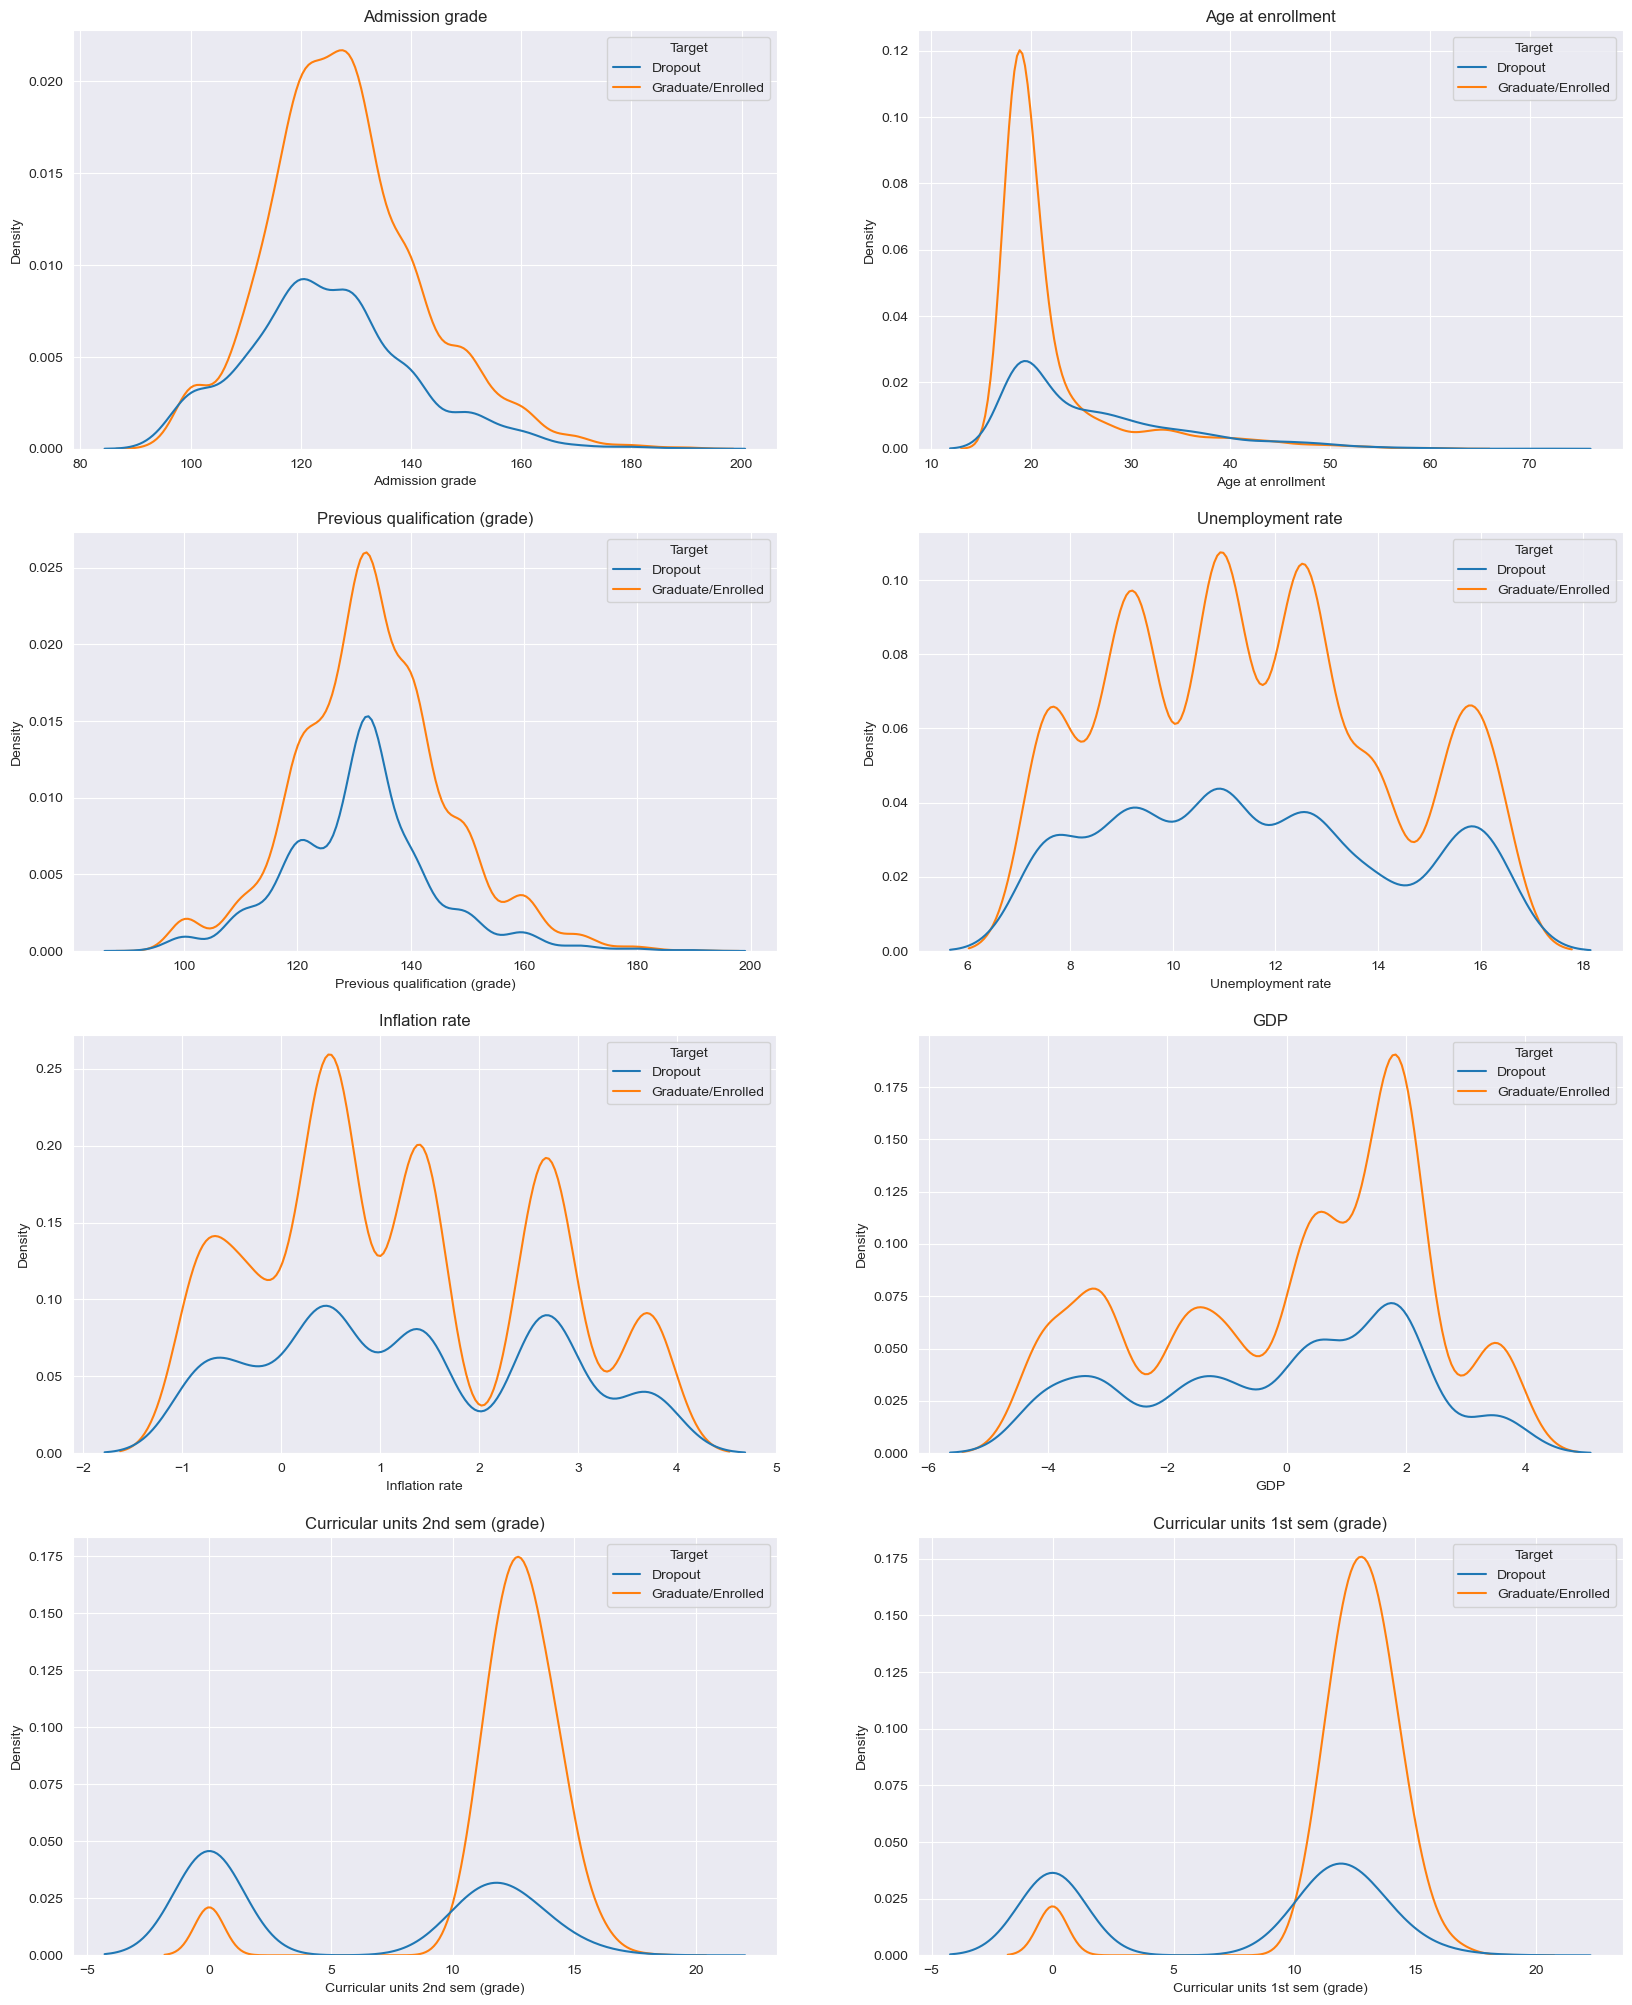

In [55]:
pos = 1
plt.figure(figsize=(20,25))
for col in cols:
    if col != 'Target':
        plt.subplot(4,2,pos)
        sns.kdeplot(data=df1_quant, x=col, hue='Target')
        plt.title(f"{col}")
        pos += 1

In [56]:
corr_matrix = df1_quant.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr_matrix, annot=True)
plt.show()

ValueError: could not convert string to float: 'Dropout'

> #### Quantitative data and the target variable

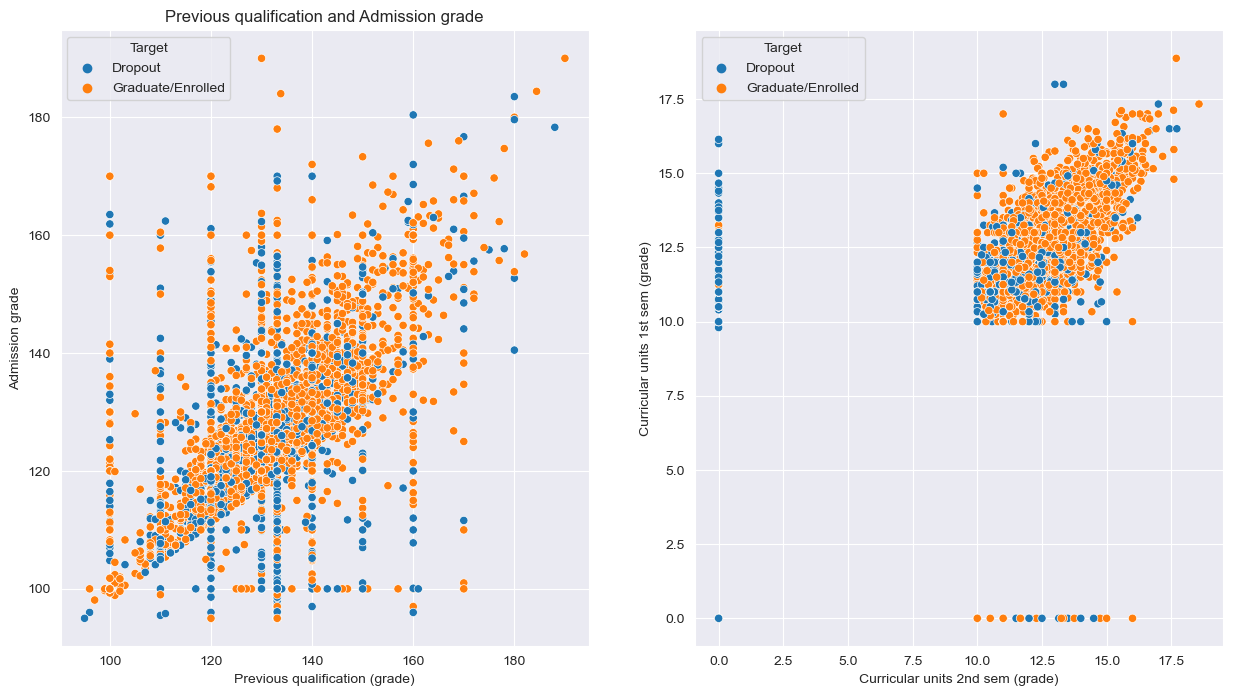

In [57]:
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
sns.scatterplot(data=df1, x='Previous qualification (grade)', y='Admission grade', hue='Target')
plt.title('Previous qualification and Admission grade')

plt.subplot(1,2,2)
sns.scatterplot(data=df1, x='Curricular units 2nd sem (grade)', y='Curricular units 1st sem (grade)', hue='Target')

plt.show()

##### Collection Bias: Nationality Distribution

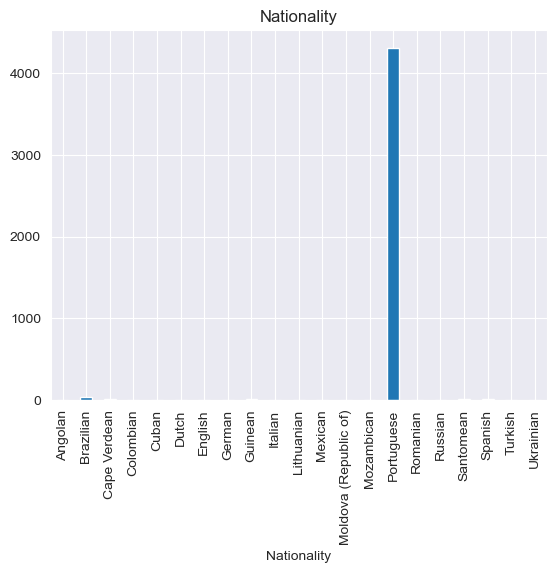

In [58]:
df1.groupby('Nationality').count().get('Marital Status').plot(kind='bar')
plt.title('Nationality')
plt.show()

### Hypothesis Testing (Leena)

The objective here is to determine whether our observed differences between dropout students and those who graduated or are still enrolled are statistically significant

##### Storing relative frequencies for desired features

In [59]:
    #marital_status
marital_status = pd.crosstab(df1['Target'], df1['Marital Status'])
marital_status_relfreq_drop = marital_status.loc['Dropout'] / df1_drop.shape[0]
marital_status_relfreq_grad = marital_status.loc['Graduate/Enrolled'] / df1_grad.shape[0]

    #previous qualification
prev_qual = pd.crosstab(df1['Target'], df1['Previous qualification'])
prev_qual_relfreq_drop = prev_qual.loc['Dropout'] / df1_drop.shape[0]
prev_qual_relfreq_grad = prev_qual.loc['Graduate/Enrolled'] / df1_grad.shape[0]

    #isDisplaced
displaced = pd.crosstab(df1['Target'], df1['isDisplaced'])
displaced_relfreq_drop = displaced.loc['Dropout'] / df1_drop.shape[0]
displaced_relfreq_grad = displaced.loc['Graduate/Enrolled'] / df1_grad.shape[0]

    #hasScholarship
hasScholarship = pd.crosstab(df1['Target'], df1['hasScholarship'])
hasScholarship_relfreq_drop = hasScholarship.loc['Dropout'] / df1_drop.shape[0]
hasScholarship_relfreq_grad = hasScholarship.loc['Graduate/Enrolled'] / df1_grad.shape[0]

    #isDebtor
isDebtor = pd.crosstab(df1['Target'], df1['isDebtor'])
isDebtor_relfreq_drop = isDebtor.loc['Dropout'] / df1_drop.shape[0]
isDebtor_relfreq_grad = isDebtor.loc['Graduate/Enrolled'] / df1_grad.shape[0]

### Methodology 
First, we will assume that dropout students graduate students both follow a **normal distribution**

For each question, we ran a **2 sample proportion test** with 2 different methods:
1. Performing permutation test using simulation: here we generated difference of proportions to calculated the p-value. 
2. Using the `statsmodels` module to generate p-value. 

> #### Marital Status
>
> Were more dropout students married (or once married) than students who graduated?

Let $\theta$ = The difference between the proportion of married/divorced dropout students with graduated/enrolled students

$H_0$: $\theta = 0$
> _The distribution of dropout and graduated students came from the same distribution, so any difference is due to chance._

$H_a$: $\theta > 0$
> _The difference could not have occured from chance alone, and the students came from a different population._

In [60]:
# calculating sample statistic 
sample_stat = (marital_status_relfreq_drop['Divorced'] + marital_status_relfreq_drop['Married']) - (marital_status_relfreq_grad['Divorced'] + marital_status_relfreq_grad['Married'])
sample_stat

0.07260719575990511

> ##### Running the simulation

In [61]:
def marital_diff_in_prop(shuffled_df):
    freq_table = pd.crosstab(shuffled_df['Shuffled'], shuffled_df['Marital Status'])
    
    drop_rel_freq = freq_table.loc['Dropout'] / df1_drop.shape[0]
    grad_rel_freq = freq_table.loc['Graduate/Enrolled'] / df1_grad.shape[0]

    drop_prop = drop_rel_freq['Married'] + drop_rel_freq['Divorced']
    grad_prop = grad_rel_freq['Married'] + grad_rel_freq['Divorced']

    return (drop_prop - grad_prop)

In [62]:
marital_df = df1[['Marital Status', 'Target']]
simulated_diffs = np.array([])
n = 500

for i in range(n):
    shuffled_target = np.random.permutation(marital_df.get('Target'))
    with_shuffled = marital_df.assign(Shuffled=shuffled_target)
    stat = marital_diff_in_prop(with_shuffled)
    simulated_diffs = np.append(simulated_diffs, stat)

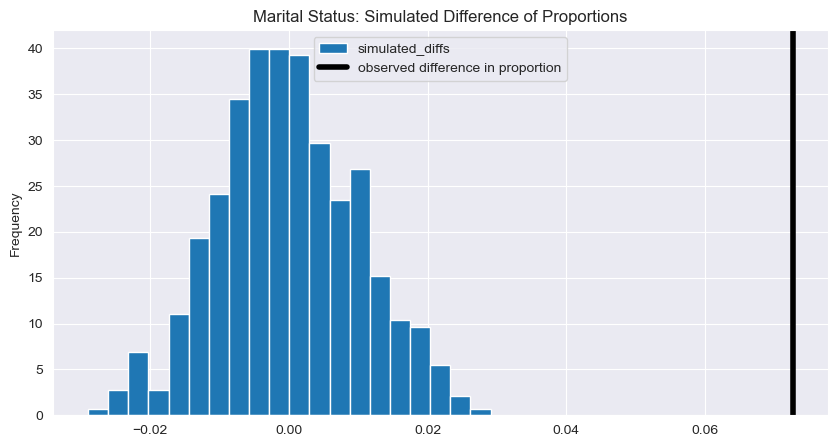

In [63]:
sns.set_style('darkgrid')

(pd.DataFrame()
 .assign(simulated_diffs=simulated_diffs)
 .plot(kind='hist', bins=20, density=True, ec='w', figsize=(10, 5))
);
plt.axvline(sample_stat, color='black', linewidth=4, label='observed difference in proportion')
plt.title('Marital Status: Simulated Difference of Proportions')
plt.legend();

In [64]:
marital_pval = np.count_nonzero(simulated_diffs >= sample_stat) / n
marital_pval

0.0

In [65]:
marital_status 

Marital Status,Divorced,Facto Union,Legally Separated,Married,Single,Widower
Target,,,,,,
Dropout,42,11,4,179,1184,1
Graduate/Enrolled,49,14,2,200,2735,3


In [66]:
# using statsmodel to perform test 
statsmodels.stats.proportion.proportions_ztest(
    count = [
        df1_drop['Marital Status'].map(lambda x: (x == 'Married') or (x == 'Divorced')).sum() ,
        df1_grad['Marital Status'].map(lambda x: (x == 'Married') or (x == 'Divorced')).sum() 
    ],
    nobs = [
        df1_drop.shape[0],
        df1_grad.shape[0]
    ],
    value = 0.0,
    alternative = 'larger'
)

(7.318038104297261, 1.258112121720764e-13)

> Both by simulation and the z-test resulted in a sufficiently small p-value, thus we reject the null. There is sufficient evidence to conclude that a **larger proportion** of **dropout students** were **married or divorced**

> ### Previous Qualification
>
> Has more dropout students not completed high school as opposed to those who have graduated/are enrolled?
>
> _In other words, do most students dropout after completing high school?_

Let $\theta$ = The difference between the proportion of dropout students who did not complete high school with graduated/enrolled students who did not complete high school.

$H_0$: $\theta = 0$
> _The distribution of dropout and graduated students came from the same distribution, so any difference is due to chance._

$H_a$: $\theta > 0$
> _The difference could not have occured from chance alone, and the students came from a different population._

In [67]:
prev_qual

Previous qualification,Below secondary,Higher,Secondary
Target,,,
Dropout,149,194,1078
Graduate/Enrolled,83,281,2639


In [68]:
#computing observed stat
sample_stat = prev_qual_relfreq_drop['Below secondary'] - prev_qual_relfreq_grad['Below secondary'] 
sample_stat

0.07721670775857967

##### Running Simulation 

In [69]:
def prev_qual_diff_in_prop(shuffled_df):
    freq_table = pd.crosstab(shuffled_df['Shuffled'], shuffled_df['Previous qualification'])
    
    drop_rel_freq = freq_table.loc['Dropout'] / df1_drop.shape[0]
    grad_rel_freq = freq_table.loc['Graduate/Enrolled'] / df1_grad.shape[0]

    drop_prop = drop_rel_freq['Below secondary'] 
    grad_prop = grad_rel_freq['Below secondary'] 
    
    return (drop_prop - grad_prop)

In [70]:
prev_qual_df = df1[['Target', 'Previous qualification']]
n = 500
simulated_diffs = np.array([])

for i in range(n):
    shuffled_target = np.random.permutation(prev_qual_df.get('Target'))
    with_shuffled = prev_qual_df.assign(Shuffled=shuffled_target)
    stat = prev_qual_diff_in_prop(with_shuffled)
    simulated_diffs = np.append(simulated_diffs, stat)

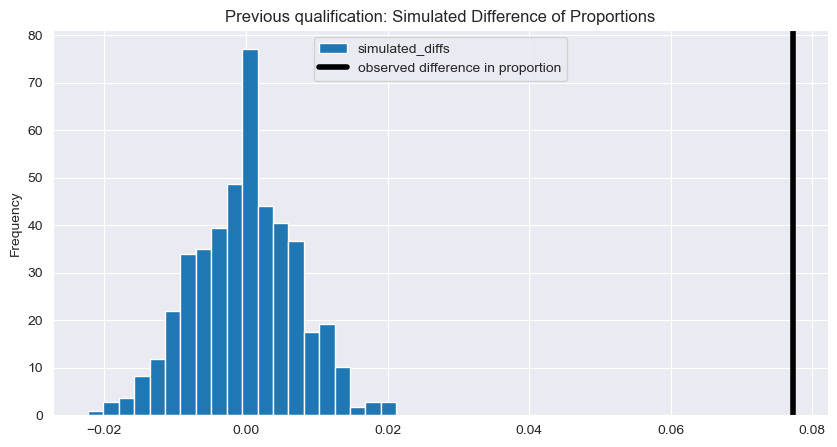

In [71]:
(pd.DataFrame()
 .assign(simulated_diffs=simulated_diffs)
 .plot(kind='hist', bins=20, density=True, ec='w', figsize=(10, 5))
);
plt.axvline(sample_stat, color='black', linewidth=4, label='observed difference in proportion')
plt.title('Previous qualification: Simulated Difference of Proportions')
plt.legend();

In [72]:
prev_qual_pval = np.count_nonzero(simulated_diffs >= sample_stat) / n
prev_qual_pval

0.0

In [73]:
# using statsmodels to perform test 
statsmodels.stats.proportion.proportions_ztest(
    count = [
        df1_drop['Previous qualification'].map(lambda x: (x == 'Below secondary')).sum(),
        df1_grad['Previous qualification'].map(lambda x: (x == 'Below secondary')).sum() 
    ],
    nobs = [
        df1_drop.shape[0],
        df1_grad.shape[0]
    ],
    value = 0.0,
    alternative = 'larger'
)

(10.758182708244705, 2.7114504223121325e-27)

> Both by simulation and the z-test resulted in a sufficiently small p-value, thus we reject the null. There is sufficient evidence to conclude that a **larger proportion** of **dropout students** were **did not complete high school**.

### Hypothesis Testing for Binary Data

In [74]:
def diff_prop(shuffled_df, col):
    """
    Given shuffled column named 'Shuffled' of the target, returns difference between proportion
    of dropout students with gradeuate/enrolled students for desired column
    """
    freq_table = pd.crosstab(shuffled_df['Shuffled'], shuffled_df[col])
    
    drop_rel_freq = freq_table.loc['Dropout'] / df1_drop.shape[0]
    grad_rel_freq = freq_table.loc['Graduate/Enrolled'] / df1_grad.shape[0]

    drop_prop = drop_rel_freq[True]
    grad_prop = grad_rel_freq[True]

    return (drop_prop - grad_prop)

> ### Displace
>
> Do graduate/enrolled students have a larger proportion of displaced students compared to dropout students?

Let $\theta$ = The difference between the proportion of dropout students who were displaced with graduated/enrolled students who did not complete high school.

$H_0$: $\theta = 0$
> _The distribution of dropout and graduated students came from the same distribution, so any difference is due to chance._

$H_a$: $\theta < 0$
> _The difference could not have occured from chance alone._

##### Running Simulation 

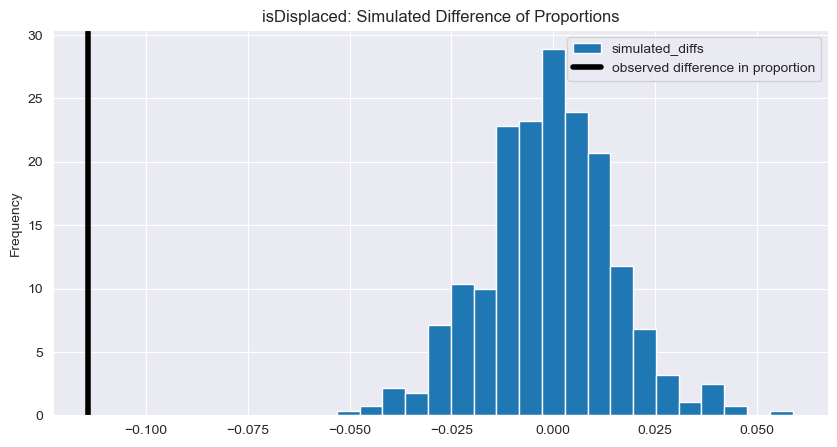

In [75]:
displaced_df = df1[['Target','isDisplaced']]
n = 500 
simulated_diffs = np.array([])

sample_stat = displaced_relfreq_drop[True] - displaced_relfreq_grad[True]

for i in range(n):
    shuffled_target = np.random.permutation(displaced_df['Target'])
    with_shuffled = displaced_df.assign(Shuffled=shuffled_target)
    stat = diff_prop(with_shuffled, 'isDisplaced') 
    simulated_diffs = np.append(simulated_diffs, stat)

# plotting simulated diffs and observed stat
(pd.DataFrame()
 .assign(simulated_diffs=simulated_diffs)
 .plot(kind='hist', bins=20, density=True, ec='w', figsize=(10, 5))
);
plt.axvline(sample_stat, color='black', linewidth=4, label='observed difference in proportion')
plt.title('isDisplaced: Simulated Difference of Proportions')
plt.legend();

In [76]:
isDisplaced_pval = np.count_nonzero(simulated_diffs <= sample_stat) / n
isDisplaced_pval

0.0

In [77]:
# using statsmodel to perform test 
statsmodels.stats.proportion.proportions_ztest(
    count = [
        df1_drop['isDisplaced'].map(lambda x: (x == True)).sum(),
        df1_grad['isDisplaced'].map(lambda x: (x == True)).sum() 
    ],
    nobs = [
        df1_drop.shape[0],
        df1_grad.shape[0]
    ],
    value = 0.0,
    alternative = 'smaller'
)

(-7.132365069915034, 4.932938815203346e-13)

> Both by simulation and the z-test resulted in a sufficiently small p-value, thus we reject the null. There is sufficient evidence to conclude that a **smaller proportion** of **dropout students** were **displaced**.

> ### hasScholarship
> 
> Do dropout students have a smaller proportion of scholarship recipients compared to graduated/enrolled students?

Let $\theta$ = The difference between the proportion of dropout students who had a scholarship with graduated/enrolled students who had a scholarship. 

$H_0$: $\theta = 0$
> _The distribution of dropout and graduated students came from the same distribution, so any difference is due to chance._

$H_a$: $\theta < 0$
> _The difference could not have occured from chance alone._

##### Running Simulation

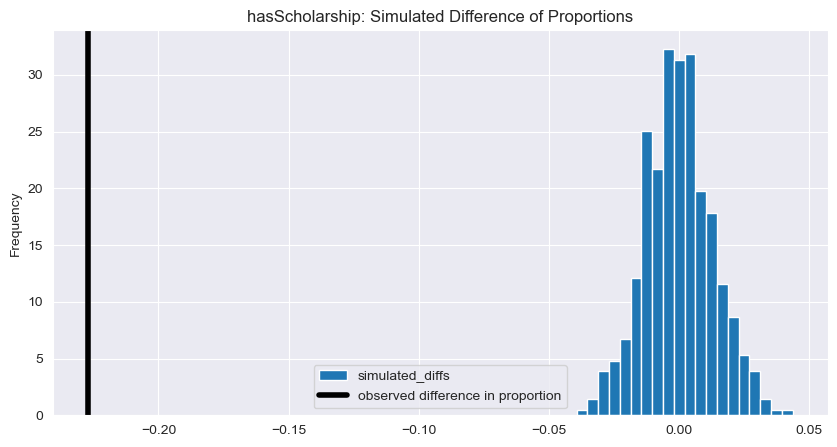

In [78]:
hasScholarship_df = df1[['Target','hasScholarship']]
n = 500 
simulated_diffs = np.array([])

sample_stat = hasScholarship_relfreq_drop[True] - hasScholarship_relfreq_grad[True] 

for i in range(n):
    shuffled_target = np.random.permutation(hasScholarship_df['Target']) 
    with_shuffled = hasScholarship_df.assign(Shuffled=shuffled_target) 
    stat = diff_prop(with_shuffled, 'hasScholarship') 
    simulated_diffs = np.append(simulated_diffs, stat) 

# plotting simulated diffs
(pd.DataFrame()
 .assign(simulated_diffs=simulated_diffs)
 .plot(kind='hist', bins=20, density=True, ec='w', figsize=(10, 5))
);
plt.axvline(sample_stat, color='black', linewidth=4, label='observed difference in proportion')
plt.title('hasScholarship: Simulated Difference of Proportions')
plt.legend();

In [79]:
# calculate p-val 
hasScholarship_pval = np.count_nonzero(simulated_diffs <= sample_stat) / n
hasScholarship_pval

0.0

In [80]:
# using statsmodels to perform test 
statsmodels.stats.proportion.proportions_ztest(
    count = [
        df1_drop['hasScholarship'].map(lambda x: (x == True)).sum(),
        df1_grad['hasScholarship'].map(lambda x: (x == True)).sum() 
    ],
    nobs = [
        df1_drop.shape[0],
        df1_grad.shape[0]
    ],
    value = 0.0,
    alternative = 'smaller'
)

(-16.319263467057727, 3.599951894765692e-60)

> Both by simulation and the z-test resulted in a sufficiently small p-value, thus we reject the null. There is sufficient evidence to conclude that a **smaller proportion** of **dropout students** were **scholarship recipients**.

> ### Debtors
> 
> Do dropout students have a larger proportion of debtors compared to graduate/enrolled students?

Let $\theta$ = The difference between the proportion of dropout students who are debtors with graduated/enrolled debtors. 

$H_0$: $\theta = 0$
> _The distribution of dropout and graduated students came from the same distribution, so any difference is due to chance._

$H_a$: $\theta > 0$
> _The difference could not have occured from chance alone._

##### Running Simulation

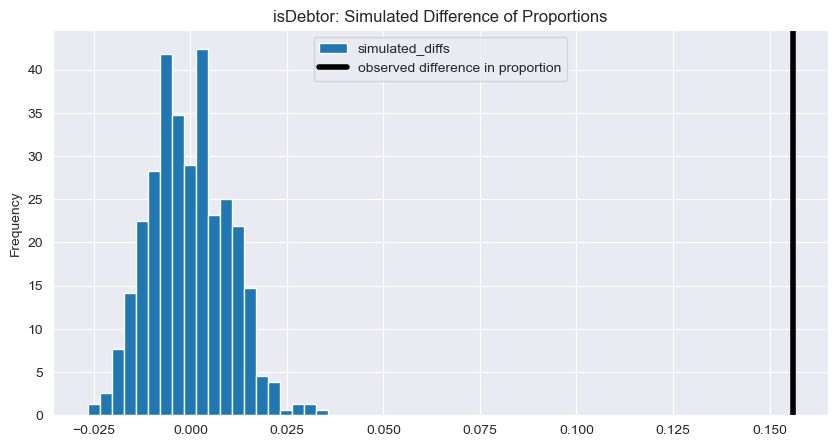

In [81]:
isDebtor_df = df1[['Target','isDebtor']]
n = 500
simulated_diffs = np.array([])

sample_stat = isDebtor_relfreq_drop[True] - isDebtor_relfreq_grad[True]

for i in range(n):
    shuffled_target = np.random.permutation(isDebtor_df['Target']) 
    with_shuffled = isDebtor_df.assign(Shuffled=shuffled_target)
    stat = diff_prop(with_shuffled, 'isDebtor') 
    simulated_diffs = np.append(simulated_diffs, stat) 

# plotting simulated diffs
(pd.DataFrame()
 .assign(simulated_diffs=simulated_diffs)
 .plot(kind='hist', bins=20, density=True, ec='w', figsize=(10, 5))
);
plt.axvline(sample_stat, color='black', linewidth=4, label='observed difference in proportion')
plt.title('isDebtor: Simulated Difference of Proportions')
plt.legend();

In [82]:
# calculating p-val 
isDebtor_pval = np.count_nonzero(simulated_diffs >= sample_stat) / n
isDebtor_pval

0.0

In [83]:
# using statsmodels to perform test 
statsmodels.stats.proportion.proportions_ztest(
    count = [
        df1_drop['isDebtor'].map(lambda x: (x == True)).sum(),
        df1_grad['isDebtor'].map(lambda x: (x == True)).sum() 
    ],
    nobs = [
        df1_drop.shape[0],
        df1_grad.shape[0]
    ],
    value = 0.0,
    alternative = 'larger'
)

(15.258604435495931, 7.215079900102946e-53)

> Both by simulation and the z-test resulted in a sufficiently small p-value, thus we reject the null. There is sufficient evidence to conclude that a **smaller proportion** of **dropout students** were **scholarship recipients**.

> ### Student Academic Path: Enrolled Courses

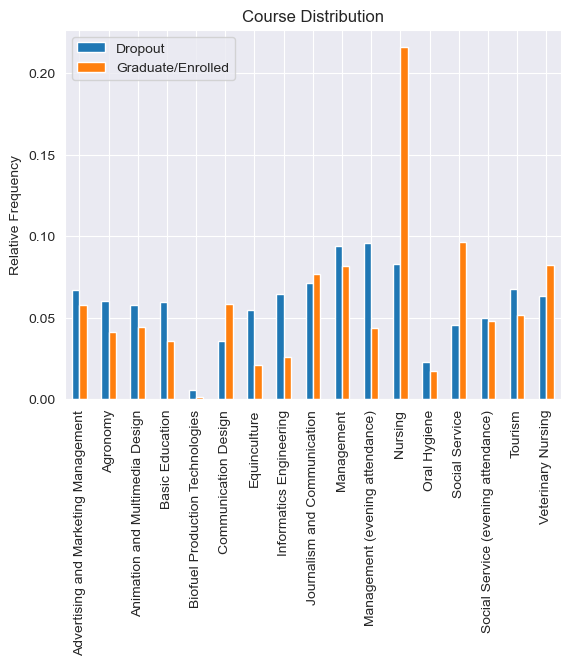

In [84]:
# df of relative frequencies
course_freq = pd.crosstab(df1['Target'], df1['Course'])

course_relfreq = pd.crosstab(df1['Target'], df1['Course'])
course_relfreq.loc['Dropout'] = (course_relfreq.loc['Dropout'] / df1_drop.shape[0])
course_relfreq.loc['Graduate/Enrolled'] = (course_relfreq.loc['Graduate/Enrolled'] / df1_grad.shape[0])

# creating df with relative frequencies of each target (to plot)
index = [col for col in course_relfreq.columns]
dropouts = course_relfreq.loc['Dropout'].values
grads = course_relfreq.loc['Graduate/Enrolled'].values

plot_course_relfreq = pd.DataFrame({'Dropout': dropouts, 'Graduate/Enrolled': grads}, index=index)

# plot
plot_course_relfreq.plot(kind='bar')
plt.ylabel('Relative Frequency')
plt.title('Course Distribution')
plt.show()

In [85]:
course_freq

Course,Advertising and Marketing Management,Agronomy,Animation and Multimedia Design,Basic Education,Biofuel Production Technologies,Communication Design,Equinculture,Informatics Engineering,Journalism and Communication,Management,Management (evening attendance),Nursing,Oral Hygiene,Social Service,Social Service (evening attendance),Tourism,Veterinary Nursing
Target,,,,,,,,,,,,,,,,,
Dropout,95,86,82,85,8,51,78,92,101,134,136,118,33,65,71,96,90
Graduate/Enrolled,173,124,133,107,4,175,63,78,230,246,132,648,53,290,144,156,247


In [86]:
# using statsmodels to perform test 
def course_two_prop_ztest(course, alternative):
    
    return (statsmodels.stats.proportion.proportions_ztest(
    count = [
        course_freq[course].loc['Dropout'],
        course_freq[course].loc['Graduate/Enrolled'] 
    ],
    nobs = [
        df1_drop.shape[0],
        df1_grad.shape[0]
    ],
    value = 0.0,
    alternative = alternative
    )
           )

##### 1. Were more dropout students enrolled in Equinculture, Informatics Engineering, and Management (evening attendance)?

Let $\theta$ = The difference between the proportion of dropout students who were enrolled in courses in question with graduated/enrolled debtors. 

$H_0$: $\theta = 0$
> _The distribution of dropout and graduated students came from the same distribution, so any difference is due to chance._

$H_a$: $\theta > 0$
> _The difference could not have occured from chance alone._

In [87]:
courses = ['Equinculture', 'Informatics Engineering', 'Management (evening attendance)']
for course in courses:
    print(course)
    print('P-value: ' + str(course_two_prop_ztest(course, 'larger')[1]))
    print('\n')

Equinculture
P-value: 1.012115096367663e-09


Informatics Engineering
P-value: 1.8773131210977776e-10


Management (evening attendance)
P-value: 8.05779486213093e-12




> Since the P-values for all courses are small, we reject the null hypothesis. Thus, we have sufficient evidence to conclude that a larger proportion of dropout students were enrolled in Equinculture, Informatics Engineering, and Management (evening attendance).

##### Were less dropout students enrolled in Nursing, Social Service, and Communication Design?
Let $\theta$ = The difference between the proportion of dropout students who were enrolled in courses in question with graduated/enrolled debtors. 

$H_0$: $\theta = 0$
> _The distribution of dropout and graduated students came from the same distribution, so any difference is due to chance._

$H_a$: $\theta < 0$
> _The difference could not have occured from chance alone._

In [88]:
courses = ['Nursing', 'Social Service', 'Communication Design']
for course in courses:
    print(course)
    print('P-Value: ' + str(course_two_prop_ztest(course, 'smaller')[1]))
    print('\n')

Nursing
P-Value: 6.031490242155022e-28


Social Service
P-Value: 3.1116227467884122e-09


Communication Design
P-Value: 0.0007952947288784664




> All of the P-values are sufficiently small, so we reject the null hypothesis for all courses. Therefore, it could be said at a smaller proportion of dropout students were enrolled in nursing, social service, and communication design.
>
> Conversely, it could be said that a **larger proportion** of **graduate/enrolled** students were enrolled in **Nursing, Social Service,** and **Communication Design**.

> ### Key Takeaways

All of our hypothesis tests **rejects the null**, suggesting 
1. A larger proportion dropout students were married or were once married.
2. A larger proportion dropout students did not complete high school (that is, students tend to drop out before completing high school).
3. A larger proportion of graduate/enrolled students were displaced. 
4. A larger proportion of graduate/enrolled students were scholarship recipients.
5. A larger proportion of dropout students were debtors.
6. More dropout students were enrolled in Equinculture, Informatics Engineering, and Management.
7. More graduate/enrolled students were enrolled in Nursing, Social Service, and Communication Design.

### More Parametric Hypothesis Testing (Leena)

##### Student Academic Path: Chi-Squared Test
> Are the enrolled courses for both graduate/enrolled and dropout students **uniform**?

In [89]:
# observing relative frequencies of course for each target
course_relfreq = pd.crosstab(df1['Target'], df1['Course'])
course_relfreq.loc['Dropout'] = (course_relfreq.loc['Dropout'] / df1_drop.shape[0])
course_relfreq.loc['Graduate/Enrolled'] = (course_relfreq.loc['Graduate/Enrolled'] / df1_grad.shape[0])
course_relfreq

Course,Advertising and Marketing Management,Agronomy,Animation and Multimedia Design,Basic Education,Biofuel Production Technologies,Communication Design,Equinculture,Informatics Engineering,Journalism and Communication,Management,Management (evening attendance),Nursing,Oral Hygiene,Social Service,Social Service (evening attendance),Tourism,Veterinary Nursing
Target,,,,,,,,,,,,,,,,,
Dropout,0.066854,0.060521,0.057706,0.059817,0.005630,0.035890,0.054891,0.064743,0.071077,0.094300,0.095707,0.083040,0.023223,0.045742,0.049965,0.067558,0.063336
Graduate/Enrolled,0.057609,0.041292,0.044289,0.035631,0.001332,0.058275,0.020979,0.025974,0.076590,0.081918,0.043956,0.215784,0.017649,0.096570,0.047952,0.051948,0.082251


> $H_0$: The frequencies for each course are uniform, and any variance is due to chance.
>
> $H_a$: A uniform proportion for each course is **not** a good fit, suggesting a skewness of a particular course the students are enrolled in.

In [90]:
# graduate/enrolled
print('Graduate/Enrolled Students')
print('P-value: ' + str(stats.chisquare(df1_grad['Course'].value_counts())[1]))

# dropout
print('\nDropout')
print('P-value: ' + str(stats.chisquare(df1_drop['Course'].value_counts())[1]))

Graduate/Enrolled Students
P-value: 0.0

Dropout
P-value: 1.2302569950781588e-34


> Both tests resulted in a p-val of 0 (or close to 0), so we reject the null for both graduate/enrolled and dropout students. Thus, it could be said that there is some skewness of the distribution of Courses that each student is enrolled in. 

### Hypothesis Testing - Cross Checking (Mackenzie)

In [93]:
df1_raw['Target'].value_counts()
#3003 graduate/enrolled
df1_raw['Scholarship holder'].value_counts()

Scholarship holder
0    3325
1    1099
Name: count, dtype: int64

Using the numbers above to cross check how many scholarship holders dropped out:

In [95]:
sum((df1_raw.Target == 'Graduate') & (df1_raw['Scholarship holder'] == 1))

835

In [96]:
sum((df1_raw.Target == 'Enrolled') & (df1_raw['Scholarship holder'] == 1))

130

In [97]:
sum((df1_raw.Target == 'Dropout') & (df1_raw['Scholarship holder'] == 1))

134

saving the values to run a binomial test to cross check that the p value is zero (or close to zero) : combining enrolled and graduated

In [98]:
total_gws = 965
total_dws = 134

In [110]:
from scipy.stats import binomtest
binomtest(k = total_gws, n = 1099, p = 965/4424, alternative='two-sided')

BinomTestResult(k=965, n=1099, alternative='two-sided', statistic=0.8780709736123748, pvalue=0.0)

p-value is zero.

Now continuing this process with the non-scholarship holders:

In [111]:
g_ns = sum((df1_raw.Target == 'Graduate') & (df1_raw['Scholarship holder'] == 0))
total_dns = sum((df1_raw.Target == 'Dropout') & (df1_raw['Scholarship holder'] == 0))
e_ns = sum((df1_raw.Target == 'Enrolled') & (df1_raw['Scholarship holder'] == 0))

In [112]:
total_gns = g_ns + e_ns
total_gns 

2038

In [123]:
binomtest(k = total_gns, n = 3325, p = 2038/4424, alternative='two-sided')

BinomTestResult(k=2038, n=3325, alternative='two-sided', statistic=0.6129323308270677, pvalue=2.332492032312599e-69)

p-value is very close to zero.

Now continuing this process with students who had educational special needs:

In [124]:
df1_raw['Educational special needs'].value_counts()

Educational special needs
0    4373
1      51
Name: count, dtype: int64

In [125]:
g_wspecial = sum((df1_raw.Target == 'Graduate') & (df1_raw['Educational special needs'] == 1))
total_dwspecial = sum((df1_raw.Target == 'Dropout') & (df1_raw['Educational special needs'] == 1))
e_wspecial = sum((df1_raw.Target == 'Enrolled') & (df1_raw['Educational special needs'] == 1))

In [126]:
total_gwspecial = g_wspecial + e_wspecial
total_gwspecial

34

In [127]:
total_dwspecial

17

In [128]:
binomtest(k = total_gwspecial, n = 51, p = 34/4424, alternative='two-sided')

BinomTestResult(k=34, n=51, alternative='two-sided', statistic=0.6666666666666666, pvalue=1.6852223183825286e-59)

p-value is very close to 0.

Continue process with students without educational special needs:

In [129]:
g_nspecial = sum((df1_raw.Target == 'Graduate') & (df1_raw['Educational special needs'] == 0))
total_dnspecial = sum((df1_raw.Target == 'Dropout') & (df1_raw['Educational special needs'] == 0))
e_nspecial = sum((df1_raw.Target == 'Enrolled') & (df1_raw['Educational special needs'] == 0))

In [130]:
total_gnspecial = g_nspecial + e_nspecial
total_gnspecial

2969

In [131]:
total_dnspecial

1404

In [133]:
binomtest(k = total_gnspecial, n = 4373, p = 2969/4424, alternative='two-sided')

BinomTestResult(k=2969, n=4373, alternative='two-sided', statistic=0.6789389435170363, pvalue=0.2738163769043208)

p-value is close to zero again.

Cross check with 'displaced' section starting with students who are displaced:

In [135]:
df1_raw['Displaced'].value_counts()

Displaced
1    2426
0    1998
Name: count, dtype: int64

In [136]:
g_isdisplaced = sum((df1_raw.Target == 'Graduate') & (df1_raw['Displaced'] == 1))
total_disdisplaced = sum((df1_raw.Target == 'Dropout') & (df1_raw['Displaced'] == 1))
e_isdisplaced = sum((df1_raw.Target == 'Enrolled') & (df1_raw['Displaced'] == 1))

In [137]:
total_gisdisplaced = g_isdisplaced + e_isdisplaced
total_gisdisplaced

1757

In [138]:
total_disdisplaced

669

In [139]:
binomtest(k = total_gisdisplaced, n = 2426, p = 1757/4424, alternative='two-sided')

BinomTestResult(k=1757, n=2426, alternative='two-sided', statistic=0.7242374278647981, pvalue=1.794342594714736e-233)

p-value is close to zero.

Continue with not displaced students:

In [140]:
g_notdisplaced = sum((df1_raw.Target == 'Graduate') & (df1_raw['Displaced'] == 0))
total_dnotdisplaced = sum((df1_raw.Target == 'Dropout') & (df1_raw['Displaced'] == 0))
e_notdisplaced = sum((df1_raw.Target == 'Enrolled') & (df1_raw['Displaced'] == 0))

In [141]:
total_gnotdisplaced = g_notdisplaced + e_notdisplaced
total_gnotdisplaced

1246

In [142]:
total_dnotdisplaced

752

In [143]:
binomtest(k = total_gnotdisplaced, n = 1998, p = 1246/4424, alternative='two-sided')

BinomTestResult(k=1246, n=1998, alternative='two-sided', statistic=0.6236236236236237, pvalue=2.296475757385936e-221)

p-value is close to zero again.

Cross check last values - debtor section, starting with is debtor students:

In [144]:
df1_raw['Debtor'].value_counts()

Debtor
0    3921
1     503
Name: count, dtype: int64

In [145]:
g_isdebtor = sum((df1_raw.Target == 'Graduate') & (df1_raw['Debtor'] == 1))
total_disdebtor = sum((df1_raw.Target == 'Dropout') & (df1_raw['Debtor'] == 1))
e_isdebtor = sum((df1_raw.Target == 'Enrolled') & (df1_raw['Debtor'] == 1))

In [146]:
total_gisdebtor = g_isdebtor + e_isdebtor
total_gisdebtor

191

In [147]:
total_disdebtor

312

In [149]:
binomtest(k = total_gisdebtor, n = 503, p = 191/4424, alternative='two-sided')

BinomTestResult(k=191, n=503, alternative='two-sided', statistic=0.3797216699801193, pvalue=9.51992942862368e-124)

p-value is close to zero again.

Last check, with non debtor students:

In [150]:
g_notdebtor = sum((df1_raw.Target == 'Graduate') & (df1_raw['Debtor'] == 0))
total_dnotdebtor = sum((df1_raw.Target == 'Dropout') & (df1_raw['Debtor'] == 0))
e_notdebtor = sum((df1_raw.Target == 'Enrolled') & (df1_raw['Debtor'] == 0))

In [151]:
total_gnotdebtor = g_notdebtor + e_notdebtor
total_gnotdebtor

2812

In [152]:
total_dnotdebtor

1109

In [153]:
binomtest(k = total_gnotdebtor, n = 3921, p = 2812/4424, alternative='two-sided')

BinomTestResult(k=2812, n=3921, alternative='two-sided', statistic=0.7171639887783728, pvalue=3.588691834925147e-27)

p-value is close to zero again


Overall, all p-values were close to zero and values were same as Leena's tests. Cross-check is good and we should reject the null for both graduate/enrolled and dropout students.

### Logistic Regression (Samuel)

In [ ]:
# importing libraries
import plotly
import plotly.express as px
import plotly.graph_objects as go

import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score

### Random Forest Classifier (Krystal)

In [ ]:
# importing libraries 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

#### Data Cleaning and Preprocessing

Since we are predicting if the student is a drop-out or not, we will only need to divide them into two groups: dropout, and enrolled/graduate. Thus, 'Graduate' and 'Enrolled' in the original dataset are combined into one group 'Graduate/Enrolled'. In the resulting data frame, Target is a binary variable, which 0 indicates that the student is a drop-out, and 1 indicates that the student is a non drop-out.

In [ ]:
df1 = df1_raw.copy(deep=True)
# Combining 'Graduate' and 'Enrolled' into one 
def get_target(y):
    if (y == 'Graduate') or (y == 'Enrolled'):
        return 'Graduate/Enrolled'
    else:
        return 'Dropout'
        
df1['Target'] = df1.get('Target').apply(get_target)

df1['Target'] = df1['Target'].apply(lambda x: 0 if x == 'Dropout' else 1)

In [ ]:
df1.head()

#### Determine Features, and process the Data Frame
Based on our Exploratory Data Analysis and Hypothesis Testing, we found out that comparing to students who are not dropping out, drop-out students have noticeable larger proportion in the following categories of 1) married or divorced, 2) not compeleting high school, 3) not displaced, 4)being debtors. Moreover, these students have obvious lower proportion in having a scholarship. Thus, among all the categorical columns in the dataset, the following 5 columns will be taking into account as our features for the **Baseline model**: Marital Status, Displaced, Previous Qualification (grade), Debtor, and Scholarship. 

In [ ]:
#for our baseline model, we wll only have the 5 categorical features, and the target.
df_base = df1[['Marital Status','Displaced','Previous qualification (grade)',
               'Debtor','Scholarship holder','Target']]
df_base = pd.get_dummies(df_base, columns=['Marital Status'])
df_base.head()

#### Split the dataset into Features and Target Variable

The dataset above is now prepared to conduct further training and is splitted into features and target variables based on the study from earlier sections. In order to prevent overfitting of the model, 20% of the data in the dataset is selected to be the test data, an the rest 80% will be the training data. 


In [ ]:
# Split dataset into features and target variable
X_base = df_base.drop('Target', axis=1)
y_base = df_base['Target']

# Split data into training and test sets
X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X_base, y_base, test_size=0.2, random_state=42)

# Feature scaling
scaler_base = StandardScaler()
X_train_base = scaler_base.fit_transform(X_train_base)
X_test_base = scaler_base.transform(X_test_base)


#### Building Random Forest Classifier for Baseline Model
The final target classification is binary, with the choices of being drop-out or not. The classifer being used to build this model is **Random Forest Classifier**. In the following section, the classifier will be initialized and perform training process on the training data. 

In [ ]:
from sklearn.metrics import confusion_matrix
# Initialize the model
model_base = RandomForestClassifier(random_state=42)

# Train the model
model_base.fit(X_train_base, y_train_base)

# Predict on the test data
y_pred_base = model_base.predict(X_test_base)

# Evaluate the model
baseline_accuracy = accuracy_score(y_test_base, y_pred_base)
print(f'Accuracy: {baseline_accuracy}')

#confusion matrix
confusion_matrix_base = confusion_matrix(y_test_base, y_pred_base)

confusion_matrix_base


The accuracy score for the baseline model is 0.69, meaning the model is able to predict 69% of test data. From the confusion matrix, we found out that 94 observations are true positive, and 519 are true negative. There is a relatively high Type 1 error rate. We will continue refining our model in the next section. 

#### Adding Second Semester Grades into the Model

Calculating the mean second semester grade for both drop-out students and non drop-out students, we found out the mean is quite different. In the visualization below, it has shown that the second semester grade for drop-out students is much lower than those of non drop-out students. This implies that the second semester grade might have a greate effect on the accuracy of the prediction model. In the following updated model, Second Semester Grade will be added into the model, and this model now has 6 features. 

In [ ]:
gr_dropout = (df1[df1['Target']==0]['Curricular units 2nd sem (grade)']).mean()
gr_non = (df1[df1['Target']==1]['Curricular units 2nd sem (grade)']).mean()
print(gr_dropout,gr_non)
#The second semester grade for dropout is 5.9/20, and is 12.3 for non-dropout. The dropout students have much lower grades.

In [ ]:
grades = [gr_dropout,gr_non]
labels = ['Dropout', 'Non-dropout']
title = 'Second Semester Grade - Dropout vs. Non-Dropout'
y_max = 20

# Creating the bar plot
plt.figure()
plt.bar(labels, grades, color=['red', 'green'])
plt.ylim(0, y_max)

# Adding titles and labels
plt.title(title)
plt.xlabel('Status')
plt.ylabel('Grade')
# Show plot
plt.show()

In [ ]:
#adding new features into the model.
df_updated = df1[[
    'Curricular units 2nd sem (grade)',
    'Marital Status','Displaced',
    'Previous qualification (grade)',
    'Debtor',
    'Scholarship holder',
    'Target']]
df_updated = pd.get_dummies(df_updated, columns=['Marital Status'])
df_updated.head()

In [ ]:
X_updated = df_updated.drop('Target', axis=1)
y_updated = df_updated['Target']

# Split data into training and test sets
X_train_updated, X_test_updated, y_train_updated, y_test_updated = train_test_split(X_updated, y_updated, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_updated = scaler.fit_transform(X_train_updated)
X_test_updated = scaler.transform(X_test_updated)

model_updated = RandomForestClassifier(random_state=42)

# Train the model
model_updated.fit(X_train_updated, y_train_updated)

# Predict on the test data
y_pred_updated = model_updated.predict(X_test_updated)

# Evaluate the model
final_accuracy = accuracy_score(y_test_updated, y_pred_updated)
print(f'Accuracy: {final_accuracy}')

confusion_matrix_updated = confusion_matrix(y_test_updated, y_pred_updated)

confusion_matrix_updated

After adding the second semester grade as one of the feature, the true positive observations have significantly increase, and the accuracy score is increased by around 8% comparing to the baseline model. The accuracy score is now 77.85%. This improvement has shown that the second semester grade does have prediction power in terms of deciding if a student is a drop-out. 

#### Final Model

In the final model, addition to the 6 features we had in the updated model, two more features which are "Course" and "Tuition fees up to date" will be added. 

In the left visualization below, it is quite obvious that most of the enrolled/graduate students have tuition fees up to date. However, by looking at the second graph for the drop out students, 32% of drop-out students do not pay off all the tuition fees. 

In [ ]:
# Data for plotting - first graph
categories = ['Yes', 'No']
values_target_0 = ((df1[df1['Target']==1]['Tuition fees up to date'].value_counts(normalize=True)).values)*100

# Data for plotting - second graph
values_target_1 = ((df1[df1['Target']==0]['Tuition fees up to date'].value_counts(normalize=True)).values)*100

# Creating the subplots
fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # 1 row, 2 columns

# First bar plot
axes[0].bar(categories, values_target_0, color=['lightgreen', 'lightcoral'])
axes[0].set_title('Tuition Fee Up to Date For Dropout (Target 0)')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Percentage')
axes[0].set_ylim(0, 100)

# Second bar plot
axes[1].bar(categories, values_target_1, color=['lightgreen', 'lightcoral'])
axes[1].set_title('Tuition Fee Up to Date For Non-Dropout (Target 1)')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Percentage')
axes[1].set_ylim(0, 100)

# Display the bar plots
plt.tight_layout()
plt.show()

Moreover, connecting back to the hypothesis testing from earlier, there are sufficient evidences supporting that a larger proportion of dropout students were enrolled in Equinculture, Informatics Engineering, and Management (evening attendance). To have a better understanding on the proportions, the visualization below has shown that 50.7% of the students in the Management (evening attendance) course dropped out at the end. 

In [ ]:
#non drop-out
df1[df1['Target']==1]['Course'].value_counts(normalize=True)
df1[df1['Course']==9991]['Target'].value_counts(normalize=True)

import matplotlib.pyplot as plt

# Data to plot
labels = 'Dropout', 'Non-Dropout'
sizes = (df1[df1['Course']==9991]['Target'].value_counts()).values  # Values are percentages of the 'Target' column
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)  # explode the 1st slice (Non-Dropout)

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Drop-Out for Management Major')
plt.show()

With these analysis, we believe "course" and "Tuition fees up to date" may improve the prediction accuracy of the model.

In [ ]:
#grades, 
df_final = df1[[
    'Course',
    'Tuition fees up to date',
    'Curricular units 2nd sem (grade)',
    'Marital Status','Displaced',
    'Previous qualification (grade)',
    'Debtor',
    'Scholarship holder',
    'Target']]
df_final = pd.get_dummies(df_final,columns=['Marital Status'])
df_final = pd.get_dummies(df_final,columns=['Course'])
df_final.head()

In [ ]:
X_final = df_final.drop('Target', axis=1)
y_final = df_final['Target']

# Split data into training and test sets
X_train_gr, X_test_gr, y_train_gr, y_test_gr = train_test_split(X_final, y_final, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_gr = scaler.fit_transform(X_train_gr)
X_test_gr = scaler.transform(X_test_gr)

In [ ]:
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train_gr, y_train_gr)

# Predict on the test data
y_pred_gr = model.predict(X_test_gr)

# Evaluate the model
final_accuracy = accuracy_score(y_test_gr, y_pred_gr)
print(f'Accuracy: {final_accuracy}')

This concludes our model accuracy to 81.24%, which is a relatively high accuracy. In this section, through enhacing the prediction model, we found out that "Course", "Tuition fees up to date", "Curricular units 2nd sem (grade)", "Marital Status", "Displaced", "Previous qualification (grade)", "Debtor", and "Scholarship holder" have prediction powers in deciding if a student is a drop-out.